# About Dataset
## Context
- The dataset contains historical product demand for a manufacturing company with footprints globally. The company provides thousands of products within dozens of product categories. There are four central warehouses to ship products within the region it is responsible for. Since the products are manufactured in different locations all over the world, it normally takes more than one month to ship products via ocean to different central warehouses. If forecasts for each product in different central with reasonable accuracy for the monthly demand for month after next can be achieved, it would be beneficial to the company in multiple ways.

## Content
- Historical Product Demand.csv - CSV data file containing product demand for encoded product id's

## Acknowledgements
- This dataset is all real-life data and products/warehouse and category information encoded.

# Inspiration
- Is it possible to make forecasts for thousands of products (some of them are highly variable in terms of monthly demand) for the the month after next?


link : https://www.kaggle.com/datasets/felixzhao/productdemandforecasting/data


## Importing libraries

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

# Read the data

In [ ]:
df  = pd.read_csv('Historical Product Demand.csv', parse_dates=['Date'])


## About features :
- Product_Code
The product name encoded

- Warehouse
Warehouse name encoded

- Product_Category
Product Category for each Product_Code encoded

- Date
The date customer needs the product

- Order_Demand
single order qty

In [ ]:
df

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1048570,Product_1791,Whse_J,Category_006,2016-04-27,1000
1048571,Product_1974,Whse_J,Category_006,2016-04-27,1
1048572,Product_1787,Whse_J,Category_006,2016-04-28,2500
1048573,Product_0901,Whse_J,Category_023,2016-10-07,50


In [ ]:
df.shape


(1048575, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1048575 non-null  object        
 1   Warehouse         1048575 non-null  object        
 2   Product_Category  1048575 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1048575 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 40.0+ MB


# remove null values

In [ ]:
df.isnull().sum()

,0
Product_Code,0
Warehouse,0
Product_Category,0
Date,11239
Order_Demand,0


In [ ]:
print ('Null to Dataset Ratio in Dates: ',df.isnull().sum()[3]/df.shape[0]*100)


Null to Dataset Ratio in Dates:  1.0718355863910547


<ipython-input-68-0cd43880e0da>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print ('Null to Dataset Ratio in Dates: ',df.isnull().sum()[3]/df.shape[0]*100)


In [ ]:
df.dropna(axis=0, inplace=True) #remove all rows with na's.
df.reset_index(drop=True)

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0993,Whse_J,Category_028,2012-07-27,100
1,Product_0979,Whse_J,Category_028,2012-01-19,500
2,Product_0979,Whse_J,Category_028,2012-02-03,500
3,Product_0979,Whse_J,Category_028,2012-02-09,500
4,Product_0979,Whse_J,Category_028,2012-03-02,500
...,...,...,...,...,...
1037331,Product_1791,Whse_J,Category_006,2016-04-27,1000
1037332,Product_1974,Whse_J,Category_006,2016-04-27,1
1037333,Product_1787,Whse_J,Category_006,2016-04-28,2500
1037334,Product_0901,Whse_J,Category_023,2016-10-07,50


In [ ]:
df.isnull().sum()

,0
Product_Code,0
Warehouse,0
Product_Category,0
Date,0
Order_Demand,0


## Target Feature - Order_Demand
- Removing () from the target feature.

In [ ]:

df['Order_Demand'].unique()

array(['100 ', '500 ', '50000 ', ..., '(3750)', '(191)', '28250 '],
      dtype=object)

In [ ]:
df['Order_Demand'] = df['Order_Demand'].str.replace('(',"")
df['Order_Demand'] = df['Order_Demand'].str.replace(')',"")

#Next step is to change the data type.
df['Order_Demand'] = df['Order_Demand'].astype('int64')

- There is data for 6 years

In [ ]:
df['Date'].min() , df['Date'].max()

(Timestamp('2011-01-08 00:00:00'), Timestamp('2017-01-09 00:00:00'))

In [ ]:
df.sort_values('Date')[10:20]


,Product_Code,Warehouse,Product_Category,Date,Order_Demand
75193,Product_0642,Whse_C,Category_019,2011-10-31,3
121820,Product_0202,Whse_A,Category_007,2011-11-04,100
121819,Product_0202,Whse_A,Category_007,2011-11-04,400
131028,Product_2143,Whse_S,Category_009,2011-11-18,25
131031,Product_0131,Whse_S,Category_021,2011-11-18,12
131032,Product_0288,Whse_S,Category_021,2011-11-18,50
44450,Product_0980,Whse_A,Category_028,2011-11-18,4000
131027,Product_2138,Whse_S,Category_009,2011-11-18,49
131026,Product_2137,Whse_S,Category_009,2011-11-18,25
44795,Product_0965,Whse_A,Category_006,2011-11-18,1


In [ ]:
#Warehouse shipping by orders.
df['Warehouse'].value_counts().sort_values(ascending = False)

,count
Warehouse,
Whse_J,764447
Whse_A,142335
Whse_S,88200
Whse_C,42354


In [ ]:
df['Product_Code'].unique()

array(['Product_0993', 'Product_0979', 'Product_1159', ...,
       'Product_0237', 'Product_0644', 'Product_0853'], dtype=object)

In [ ]:
df.columns

Index(['Product_Code', 'Warehouse', 'Product_Category', 'Date',
       'Order_Demand'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1037336 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   Product_Code      1037336 non-null  object        
 1   Warehouse         1037336 non-null  object        
 2   Product_Category  1037336 non-null  object        
 3   Date              1037336 non-null  datetime64[ns]
 4   Order_Demand      1037336 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 47.5+ MB


- Create a plot of Order Demand over time


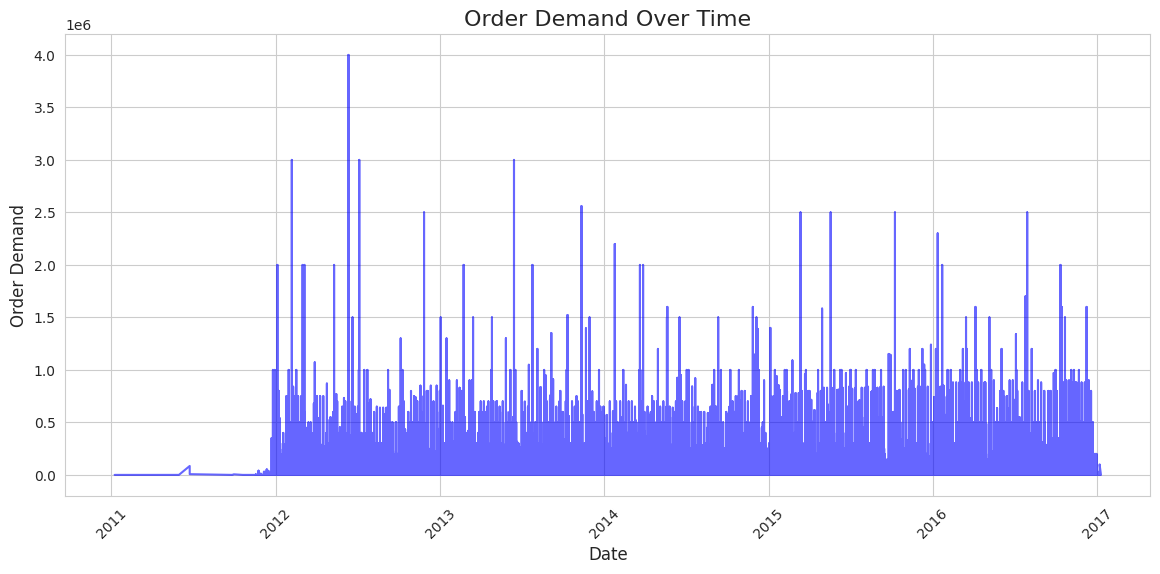

In [ ]:
df_sorted = df.sort_values(by='Date')

plt.figure(figsize=(14, 6))
plt.plot(df_sorted['Date'], df_sorted['Order_Demand'], color='blue', alpha=0.6)
plt.title('Order Demand Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Demand', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## filtered the data between 2012-01-01 and 2016-12-31
- becouse there is no orders between 2011 and 2012
- and for 2017 we just have  the begining of the year


In [ ]:
df = df[(df['Date']>='2012-01-01') & (df['Date']<='2016-12-31')].sort_values('Date', ascending=True)


## Order Demand Trends Over Time (Line Plot):


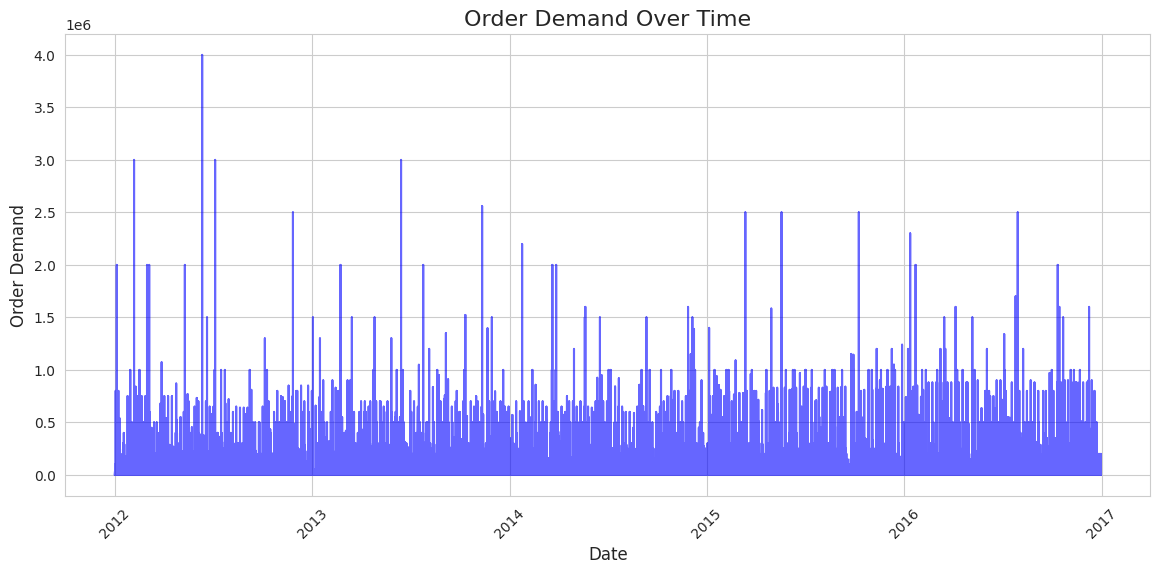

In [ ]:
df_sorted = df.sort_values(by='Date')

# Create a plot of Order Demand over time
plt.figure(figsize=(14, 6))
plt.plot(df_sorted['Date'], df_sorted['Order_Demand'], color='blue', alpha=0.6)
plt.title('Order Demand Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Demand', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Unique Values

In [ ]:
for col in df.columns:
    unique_vals = df[col].unique()
    num_unique = df[col].nunique()
    print(f"Column: {col}\nUnique Values: {unique_vals}\nNumber of Unique Values: {num_unique}\n")


Column: Product_Code
Unique Values: ['Product_2166' 'Product_0614' 'Product_1281' ... 'Product_0465'
 'Product_1013' 'Product_0853']
Number of Unique Values: 2160

Column: Warehouse
Unique Values: ['Whse_S' 'Whse_A' 'Whse_C' 'Whse_J']
Number of Unique Values: 4

Column: Product_Category
Unique Values: ['Category_024' 'Category_001' 'Category_019' 'Category_006'
 'Category_021' 'Category_011' 'Category_032' 'Category_030'
 'Category_005' 'Category_031' 'Category_026' 'Category_028'
 'Category_015' 'Category_007' 'Category_009' 'Category_004'
 'Category_022' 'Category_023' 'Category_018' 'Category_020'
 'Category_013' 'Category_003' 'Category_010' 'Category_008'
 'Category_033' 'Category_017' 'Category_029' 'Category_025'
 'Category_012' 'Category_014' 'Category_002' 'Category_027'
 'Category_016']
Number of Unique Values: 33

Column: Date
Unique Values: <DatetimeArray>
['2012-01-01 00:00:00', '2012-01-02 00:00:00', '2012-01-03 00:00:00',
 '2012-01-04 00:00:00', '2012-01-05 00:00:00', '2

## Distribution of Order Demand (Histogram):


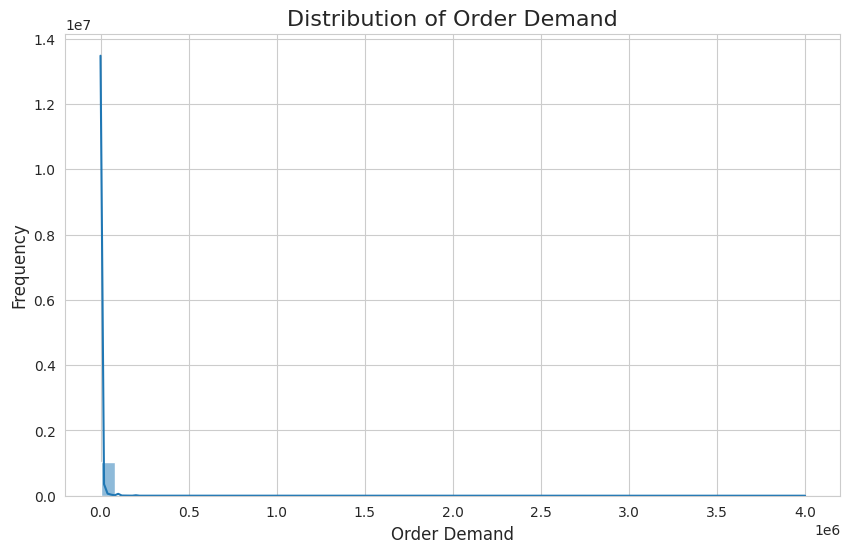

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Order_Demand'], bins=50, kde=True)
plt.title('Distribution of Order Demand', fontsize=16)
plt.xlabel('Order Demand', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



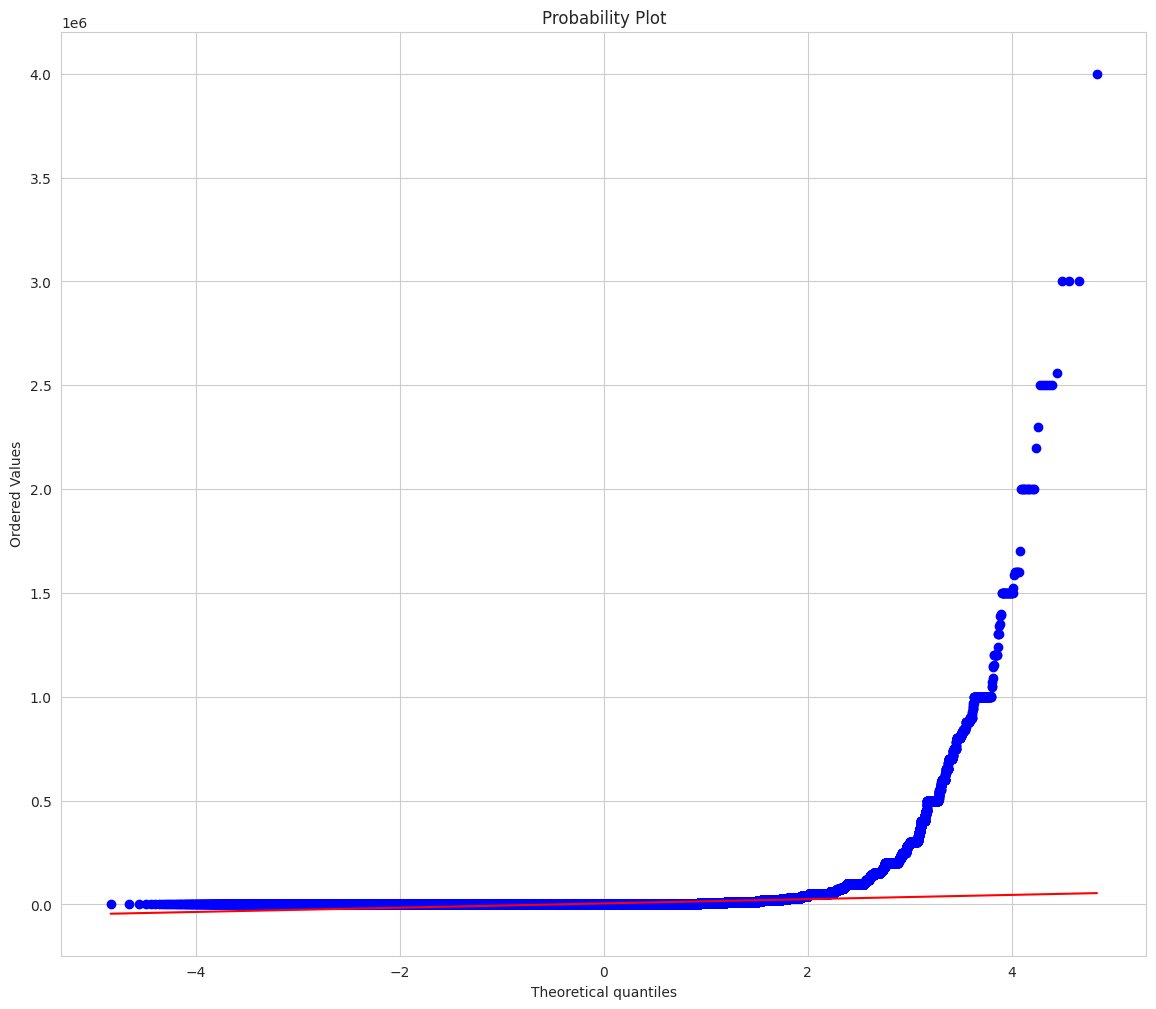

In [ ]:
#Get the QQ-plot
from scipy import stats

fig = plt.figure()
res = stats.probplot(df['Order_Demand'], plot=plt)
plt.show()

## Demand by Warehouse (Bar Chart):


In [ ]:
df['Warehouse'].value_counts().sort_values(ascending = False)


,count
Warehouse,
Whse_J,764215
Whse_A,142197
Whse_S,88024
Whse_C,42207


<ipython-input-86-0e03b34f2eae>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Warehouse', y='Order_Demand', data=warehouse_demand, palette='viridis')


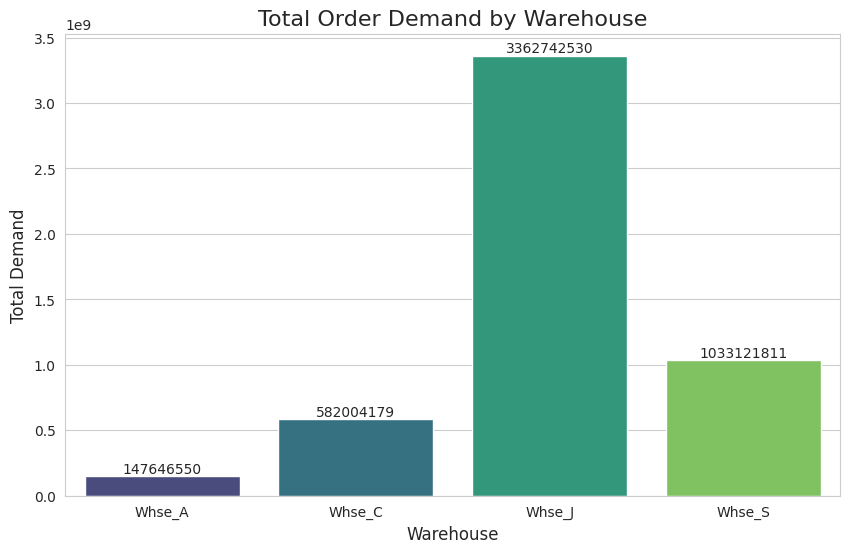

In [ ]:
plt.figure(figsize=(10, 6))
warehouse_demand = df.groupby('Warehouse')['Order_Demand'].sum().reset_index()

sns.barplot(x='Warehouse', y='Order_Demand', data=warehouse_demand, palette='viridis')

# Annotating the bars
for i in range(len(warehouse_demand)):
    plt.text(i, warehouse_demand['Order_Demand'][i], round(warehouse_demand['Order_Demand'][i], 2),
             ha='center', va='bottom')

plt.title('Total Order Demand by Warehouse', fontsize=16)
plt.xlabel('Warehouse', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.show()


## Demand by Product Category (Bar Chart):


In [ ]:
df['Product_Category'].value_counts().sort_values(ascending = False)


,count
Product_Category,
Category_019,470090
Category_005,101582
Category_001,97707
Category_007,82348
Category_021,51950
Category_006,35495
Category_028,30957
Category_011,23199
Category_015,22937


<ipython-input-88-bc32163988b8>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


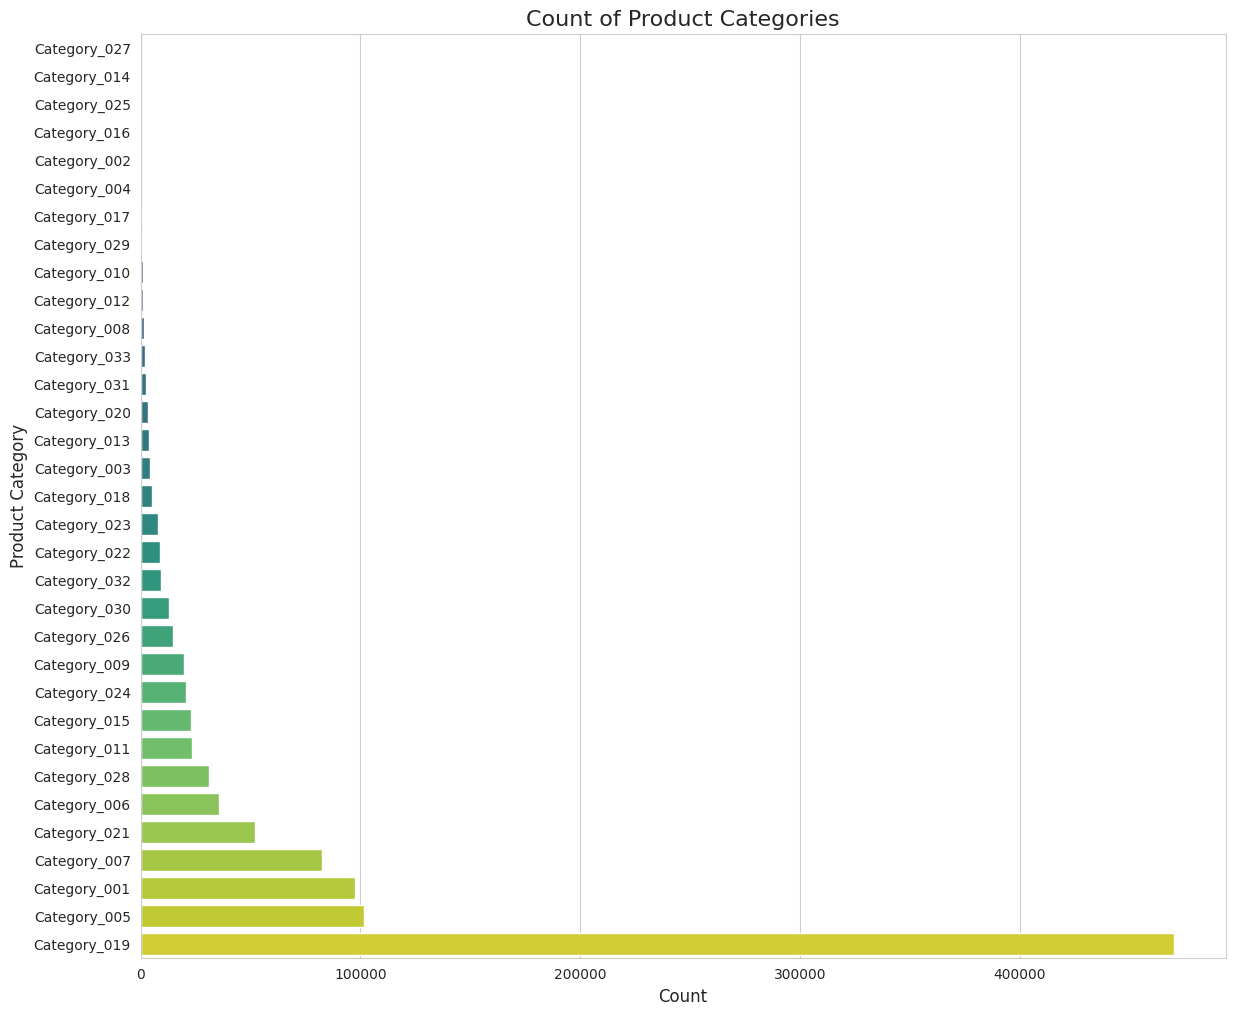

In [ ]:
# Import rcParams from matplotlib
from matplotlib import rcParams

rcParams['figure.figsize'] = 14, 12

# Generate the countplot for Product_Category
sns.countplot(
    y=df['Product_Category'].sort_values(ascending=True),
    palette='viridis',
    order=df['Product_Category'].value_counts().index[::-1]  )
# Add title and labels
plt.title('Count of Product Categories', fontsize=16)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Product Category', fontsize=12)

# Display the plot
plt.show()


In [ ]:
# Group by 'Product_Category', sum 'Order_Demand', and exclude 'Date' column
category_demand = df.groupby('Product_Category')['Order_Demand'].sum().sort_values(ascending=False).reset_index()
category_demand


,Product_Category,Order_Demand
0,Category_019,4233421162
1,Category_006,405010821
2,Category_005,198990170
3,Category_007,128660495
4,Category_028,48938528
5,Category_033,42610000
6,Category_030,40501055
7,Category_021,4472098
8,Category_032,4452008
9,Category_009,3780564


<ipython-input-90-49158aed2fbb>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Category', y='Order_Demand', data=category_demand, palette='viridis')


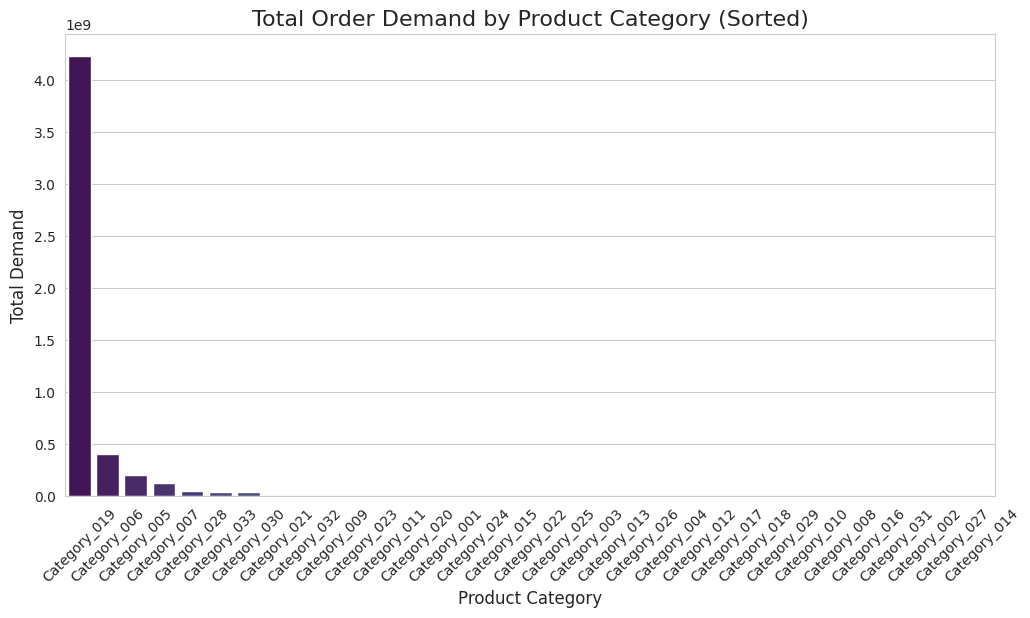

In [ ]:
# Plot the results
plt.figure(figsize=(12, 6))
sns.barplot(x='Product_Category', y='Order_Demand', data=category_demand, palette='viridis')

plt.title('Total Order Demand by Product Category (Sorted)', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.xticks(rotation=45)
plt.show()


## Top 20 Products by Demand (Bar Chart):


In [ ]:
df['Product_Code'].value_counts().sort_values(ascending = False)


,count
Product_Code,
Product_1359,16935
Product_1295,10575
Product_1378,9770
Product_0620,9397
Product_1286,8888
...,...
Product_1912,2
Product_2099,1
Product_0465,1


In [ ]:
product_demand = df.groupby('Product_Code')['Order_Demand'].sum().nlargest(40).reset_index()
product_demand

,Product_Code,Order_Demand
0,Product_1359,472374000
1,Product_1248,289117000
2,Product_0083,210651000
3,Product_1341,166411000
4,Product_1295,123303000
5,Product_1241,117679000
6,Product_1245,102637000
7,Product_1286,101566400
8,Product_1432,97029000
9,Product_1274,92811000


<ipython-input-93-bcd041d041dc>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product_Code', y='Order_Demand', data=product_demand, palette='viridis')


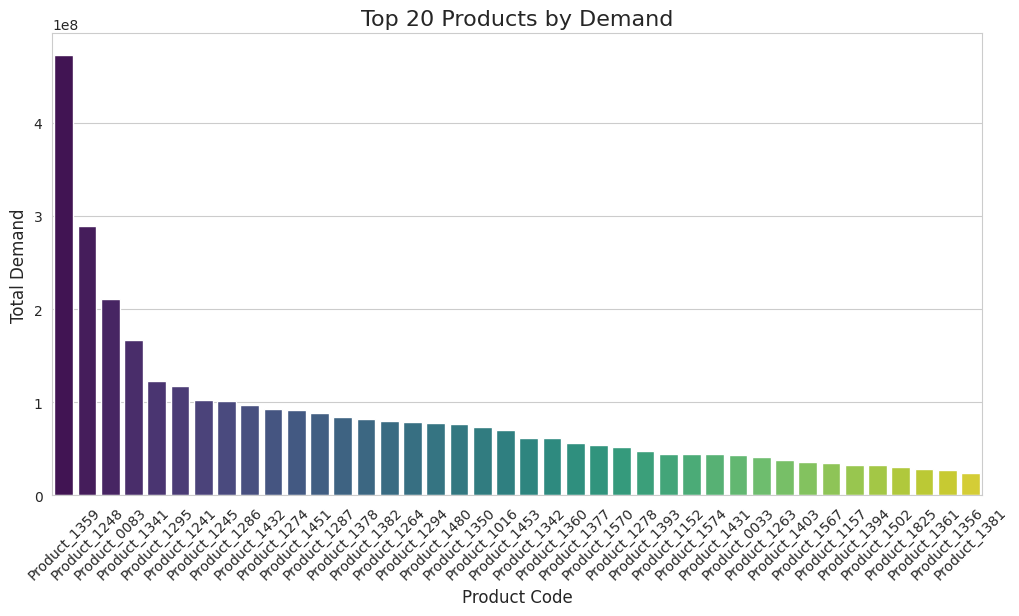

In [ ]:

plt.figure(figsize=(12, 6))

sns.barplot(x='Product_Code', y='Order_Demand', data=product_demand, palette='viridis')

plt.title('Top 20 Products by Demand', fontsize=16)
plt.xlabel('Product Code', fontsize=12)
plt.ylabel('Total Demand', fontsize=12)
plt.xticks(rotation=45)
plt.show()


# Time Series Plot:
### Plot total demand over time to observe trends.

In [ ]:
 df.groupby('Date')['Order_Demand'].sum().reset_index()

,Date,Order_Demand
0,2012-01-01,2
1,2012-01-02,680277
2,2012-01-03,1645257
3,2012-01-04,1295861
4,2012-01-05,8941774
...,...,...
1676,2016-12-26,3628370
1677,2016-12-27,1674226
1678,2016-12-28,2740302
1679,2016-12-29,530487


## Seasonal Decomposition Plot (STL Decomposition)
- This helps to break down the time series data into trend, seasonality, and residual components.

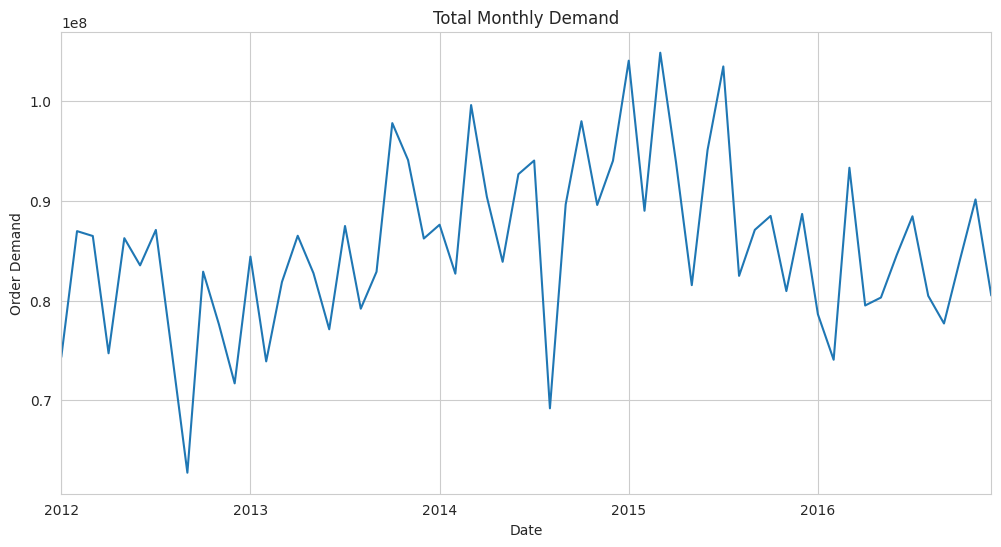

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.set_index('Date')

# Resample to monthly frequency and plot
df['Order_Demand'].resample('M').sum().plot(title='Total Monthly Demand', figsize=(12, 6))

# Add labels to the plot
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.show()



# Perform seasonal decomposition


<Figure size 1200x800 with 0 Axes>

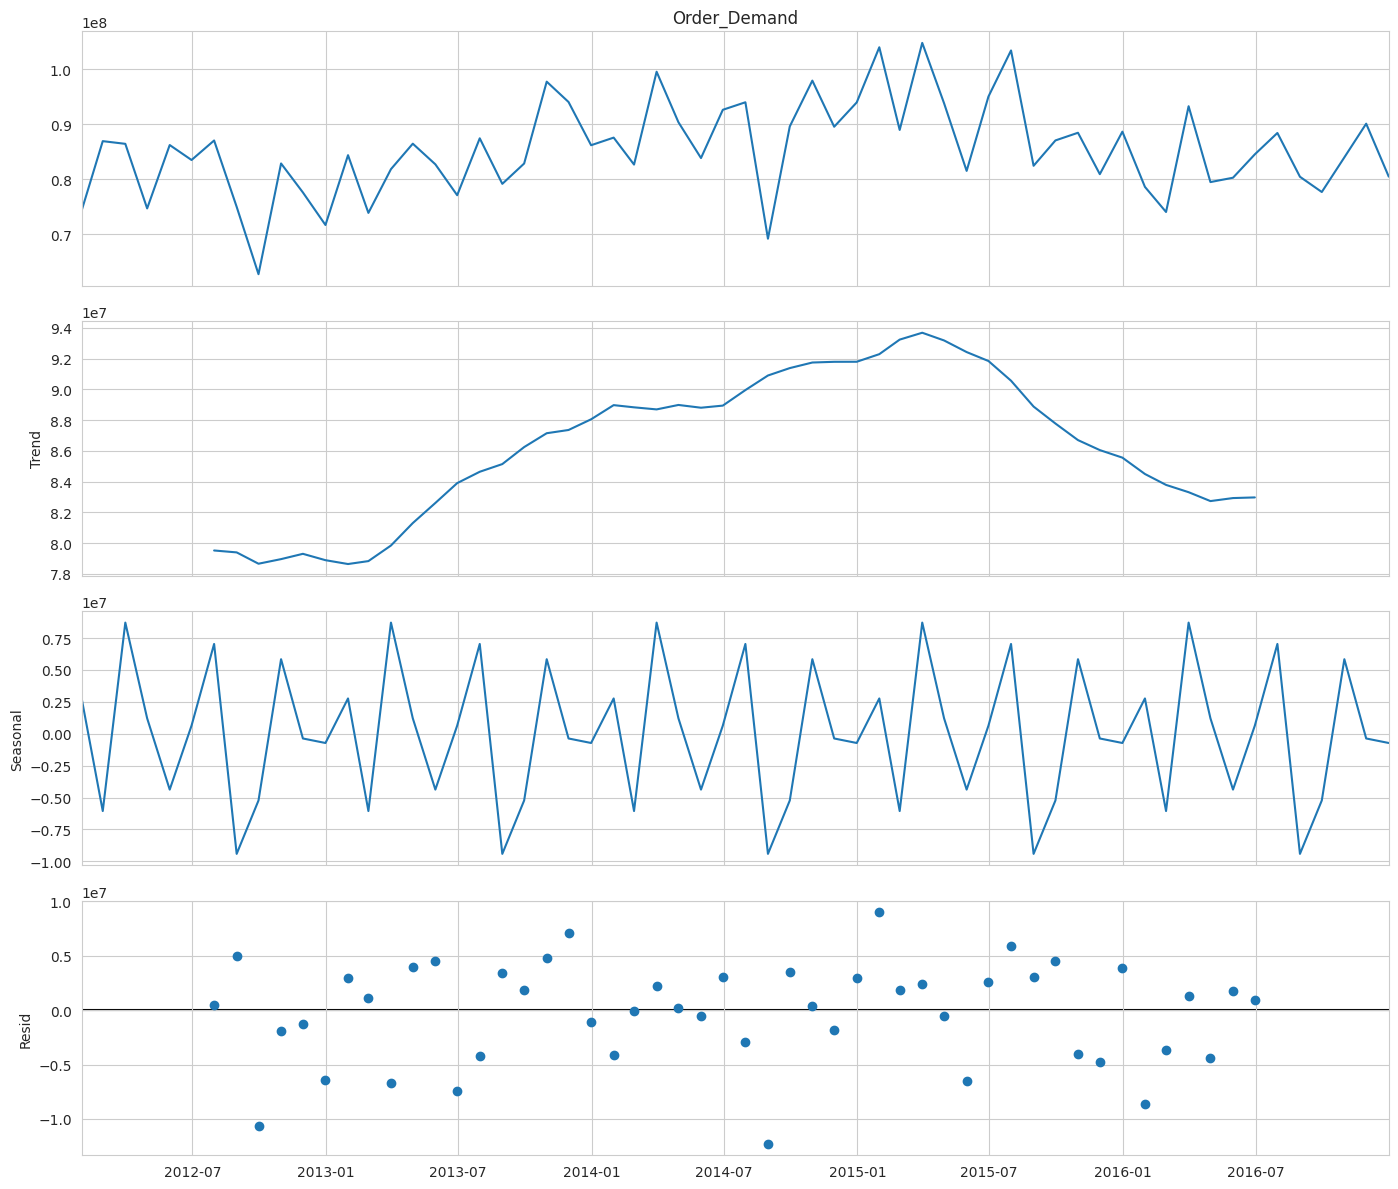

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

monthly_demand = df['Order_Demand'].resample('M').sum()

decomposition = seasonal_decompose(monthly_demand, model='additive')

# Plot the decomposition
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


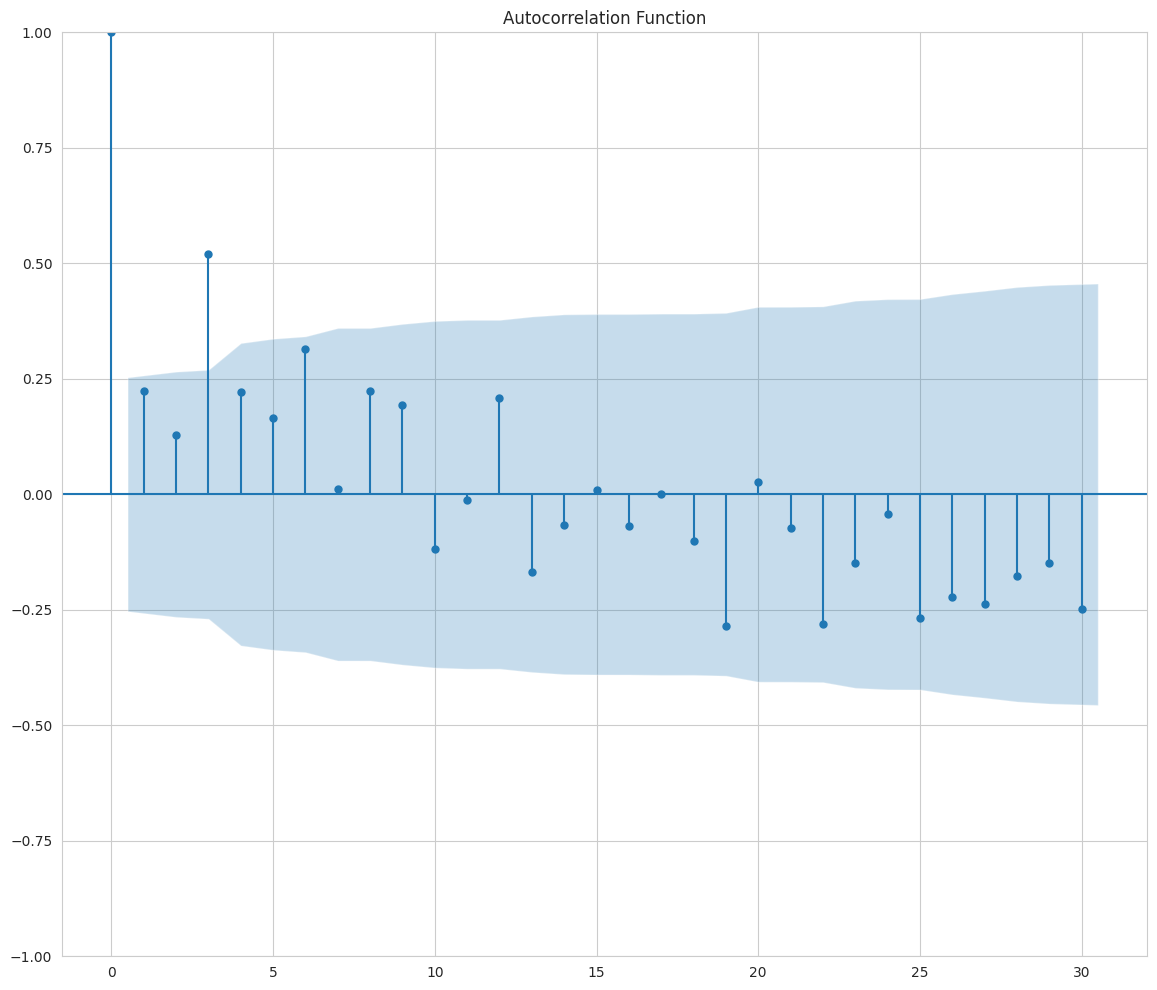

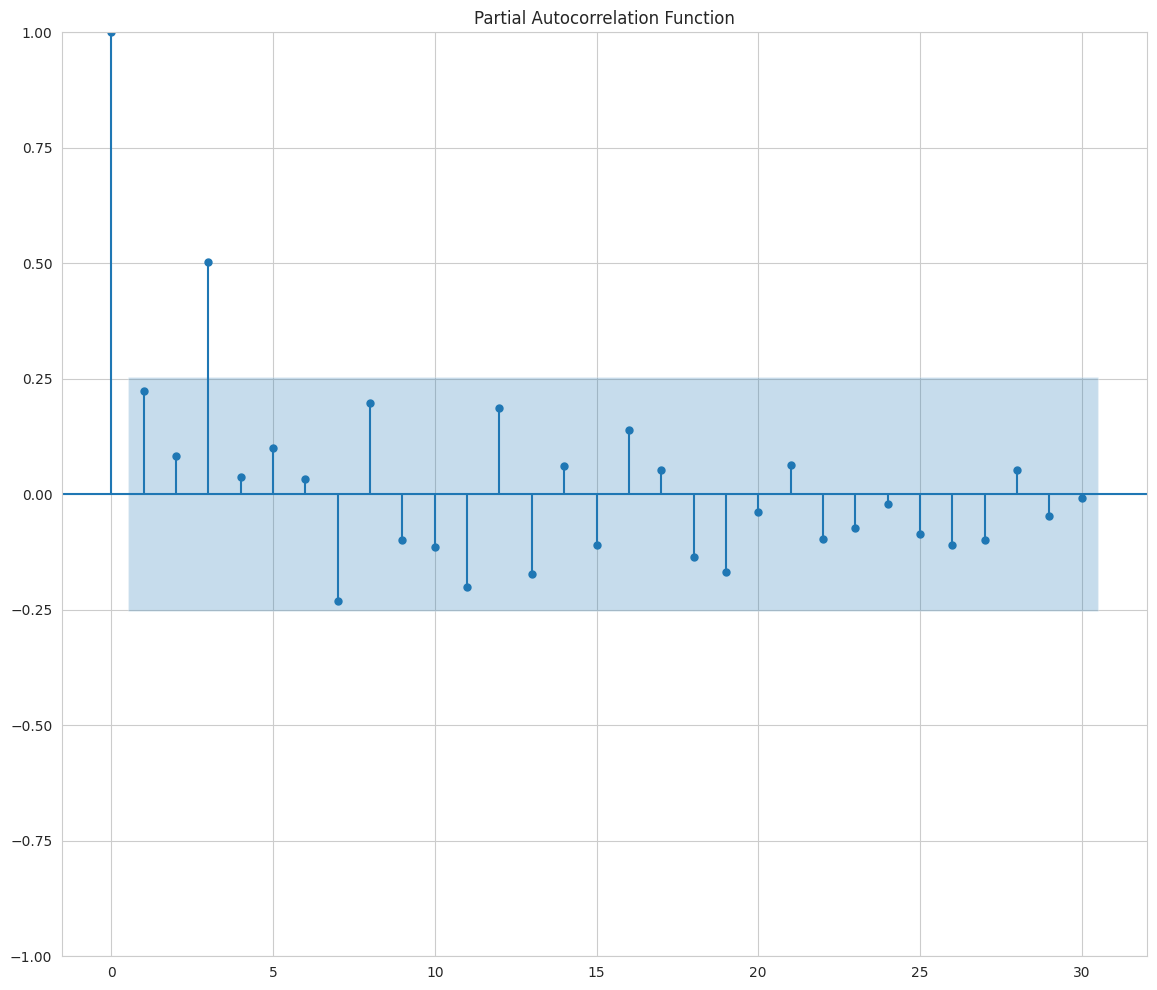

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(monthly_demand, lags=30)
plt.title('Autocorrelation Function')
plt.show()

plot_pacf(monthly_demand, lags=30)
plt.title('Partial Autocorrelation Function')
plt.show()


### Rolling Statistics Plot
- Visualize rolling statistics such as the rolling mean and standard deviation to analyze trends and variance over time.

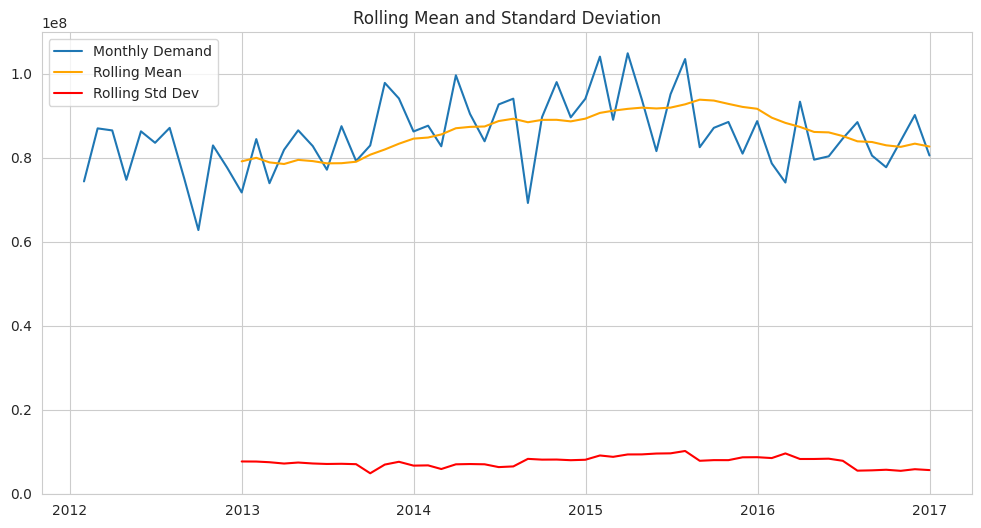

In [ ]:
rolling_mean = monthly_demand.rolling(window=12).mean()
rolling_std = monthly_demand.rolling(window=12).std()

plt.figure(figsize=(12, 6))
plt.plot(monthly_demand, label='Monthly Demand')
plt.plot(rolling_mean, label='Rolling Mean', color='orange')
plt.plot(rolling_std, label='Rolling Std Dev', color='red')
plt.legend()
plt.title('Rolling Mean and Standard Deviation')
plt.show()


# anther plots


The heatmap is based on **monthly data** aggregated by day of the week. Here’s what each part of the code means in terms of time:

- `index=df.index.month`: The **rows** represent the **months** (1 for January, 2 for February, etc.).
- `columns=df.index.dayofweek`: The **columns** represent the **days of the week** (0 for Monday, 1 for Tuesday, ..., 6 for Sunday).
- `aggfunc='sum'`: The order demand is **summed** for each combination of month and day of the week.

This plot shows **monthly demand patterns** for each day of the week, which allows you to analyze how demand changes across different days within a month over the entire dataset.

### Key Insights:
- The **X-axis** shows the **day of the week**.
- The **Y-axis** shows the **month of the year**.
- The color intensity represents the **total order demand** for a given day of the week in a specific month.

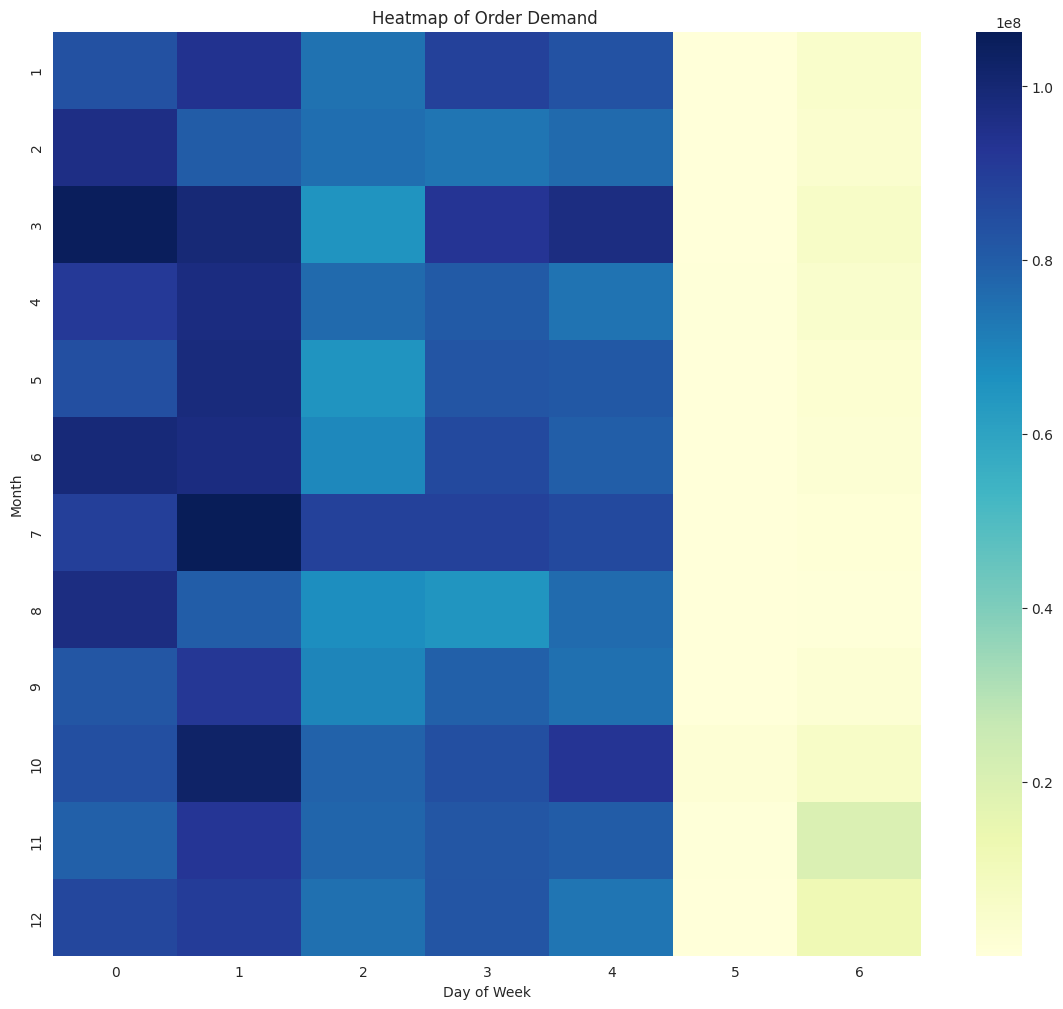

In [ ]:
demand_pivot = df.pivot_table(index=df.index.month, columns=df.index.dayofweek, values='Order_Demand', aggfunc='sum')
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand ')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

## to generate this heatmap for a specific year

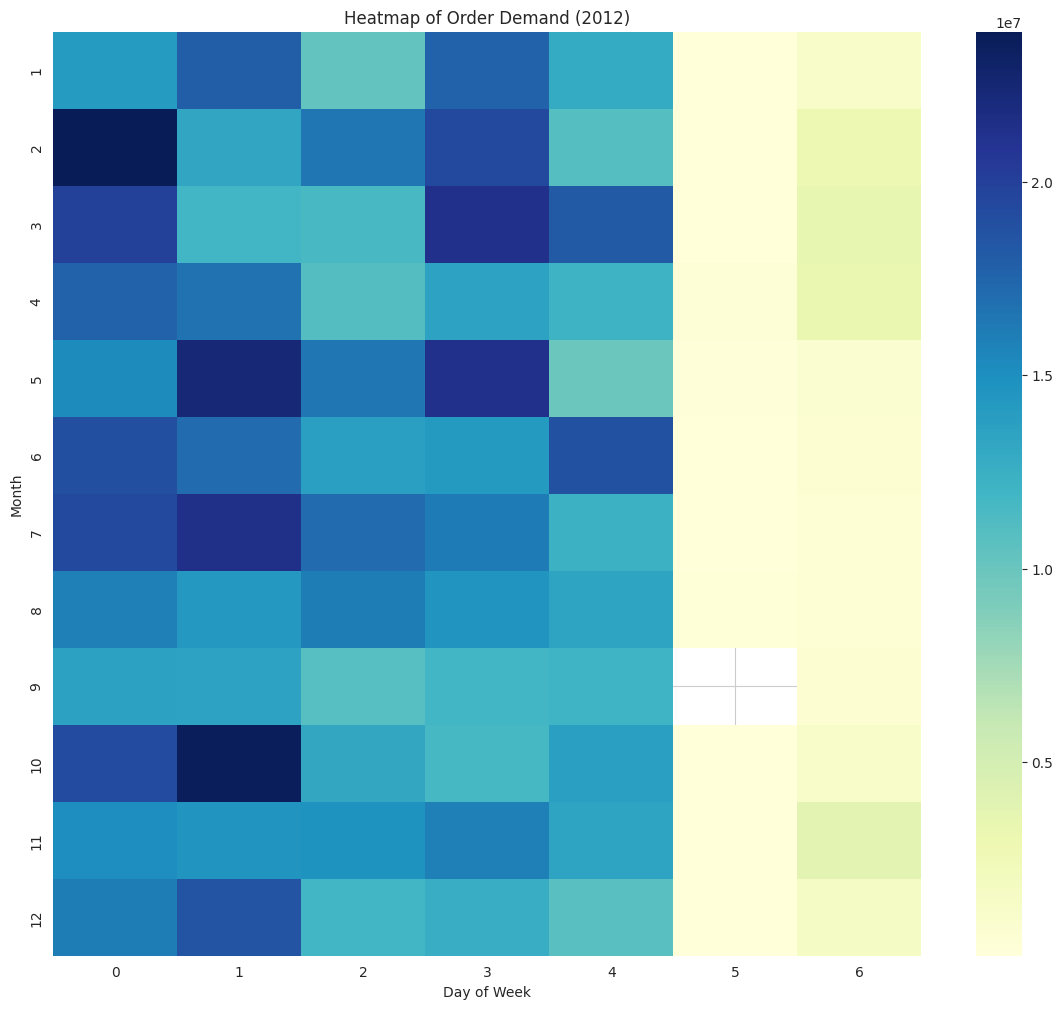

In [ ]:
df_2012 = df[df.index.year == 2012]

demand_pivot = df_2012.pivot_table(index=df_2012.index.month, columns=df_2012.index.dayofweek, values='Order_Demand', aggfunc='sum')

# Plot the heatmap
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand (2012)')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


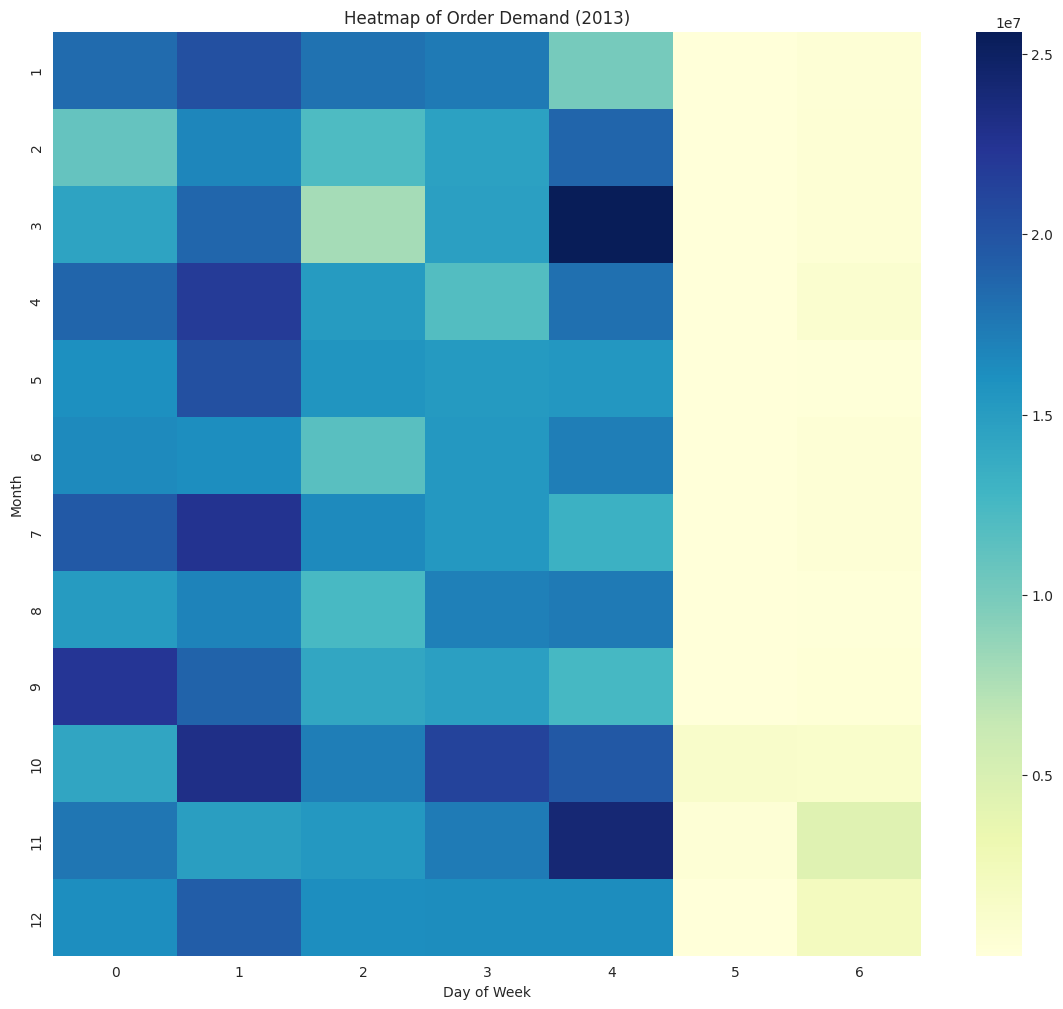

In [ ]:
df_2013 = df[df.index.year == 2013]

demand_pivot = df_2013.pivot_table(index=df_2013.index.month, columns=df_2013.index.dayofweek, values='Order_Demand', aggfunc='sum')

# Plot the heatmap
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand (2013)')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


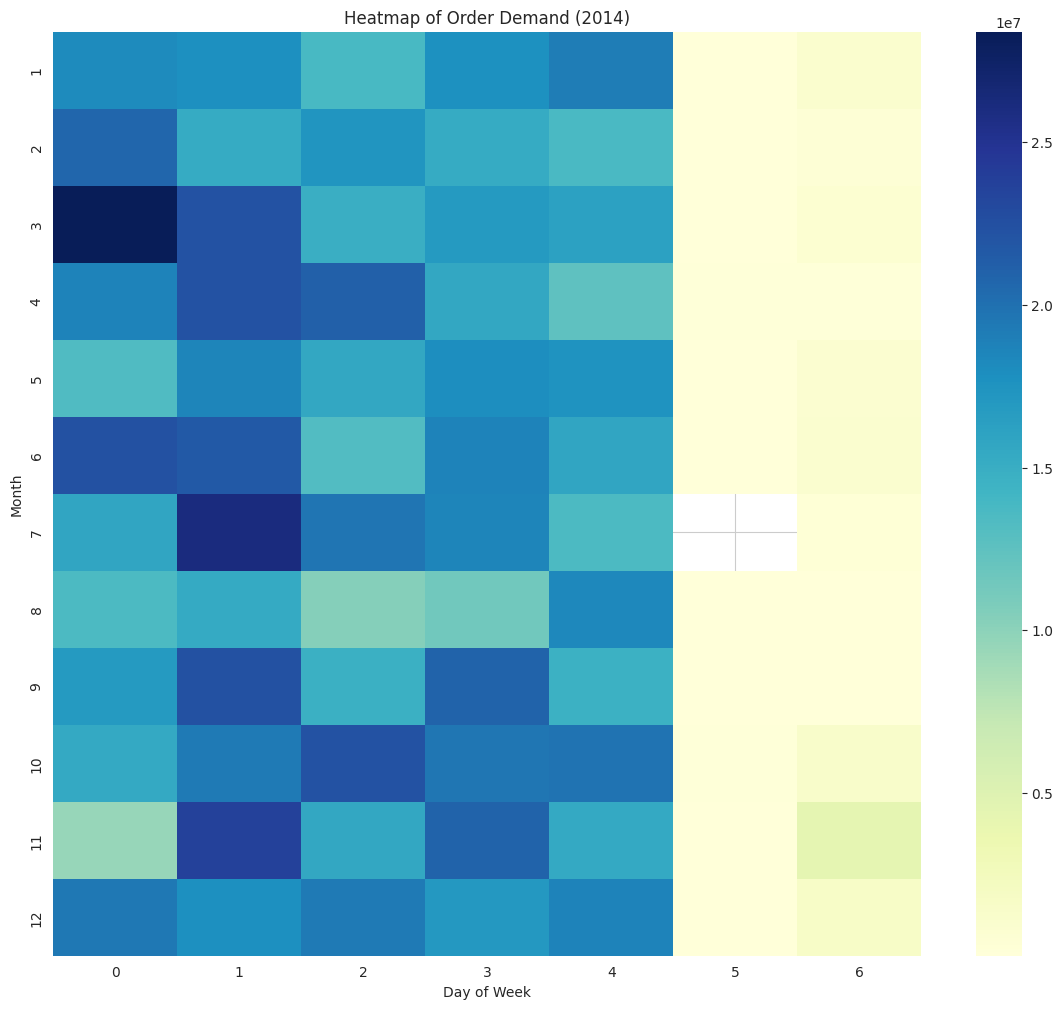

In [ ]:
df_2014 = df[df.index.year == 2014]

demand_pivot = df_2014.pivot_table(index=df_2014.index.month, columns=df_2014.index.dayofweek, values='Order_Demand', aggfunc='sum')

# Plot the heatmap
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand (2014)')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()


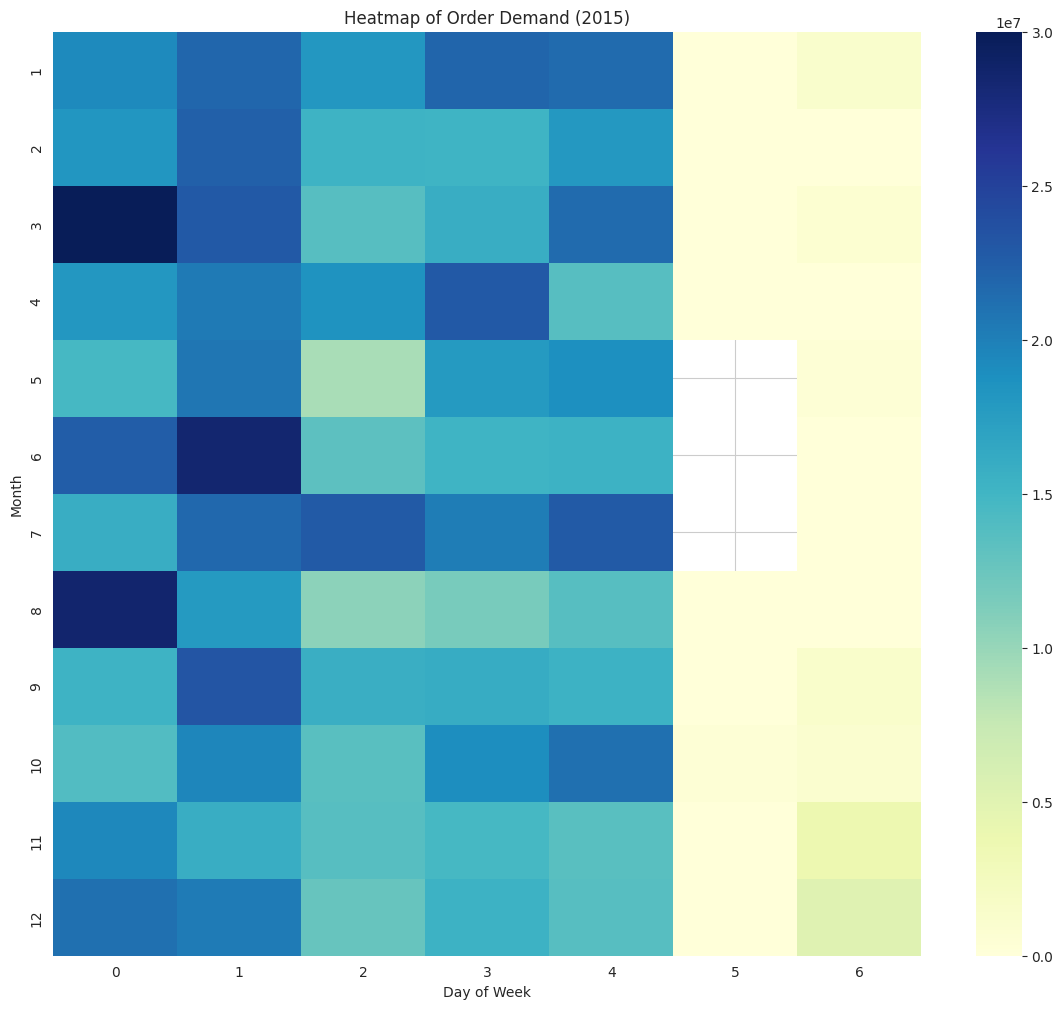

In [ ]:
df_2015= df[df.index.year == 2015]

demand_pivot = df_2015.pivot_table(index=df_2015.index.month, columns=df_2015.index.dayofweek, values='Order_Demand', aggfunc='sum')

# Plot the heatmap
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand (2015)')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

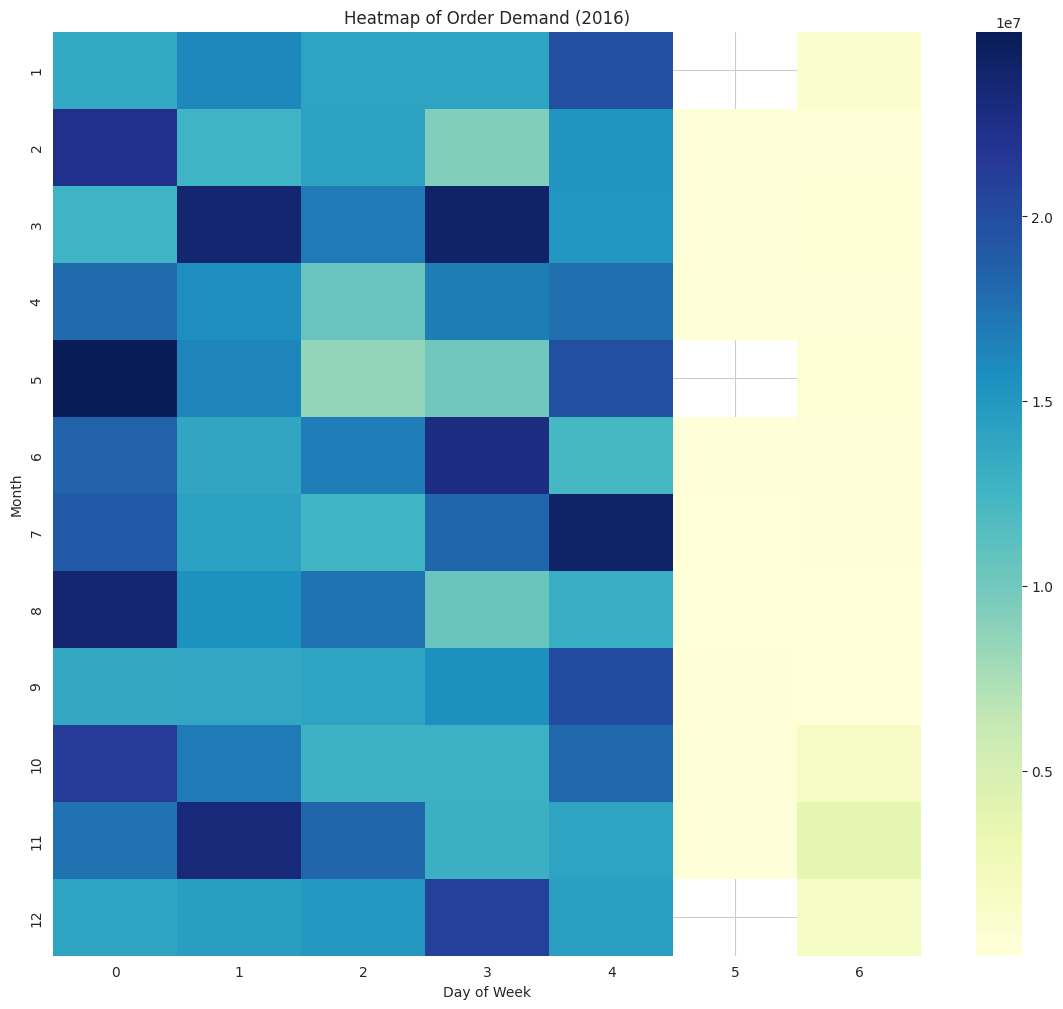

In [ ]:
df_2016 = df[df.index.year == 2016]

demand_pivot = df_2016.pivot_table(index=df_2016.index.month, columns=df_2016.index.dayofweek, values='Order_Demand', aggfunc='sum')

# Plot the heatmap
sns.heatmap(demand_pivot, cmap='YlGnBu')
plt.title('Heatmap of Order Demand (2016)')
plt.xlabel('Day of Week')
plt.ylabel('Month')
plt.show()

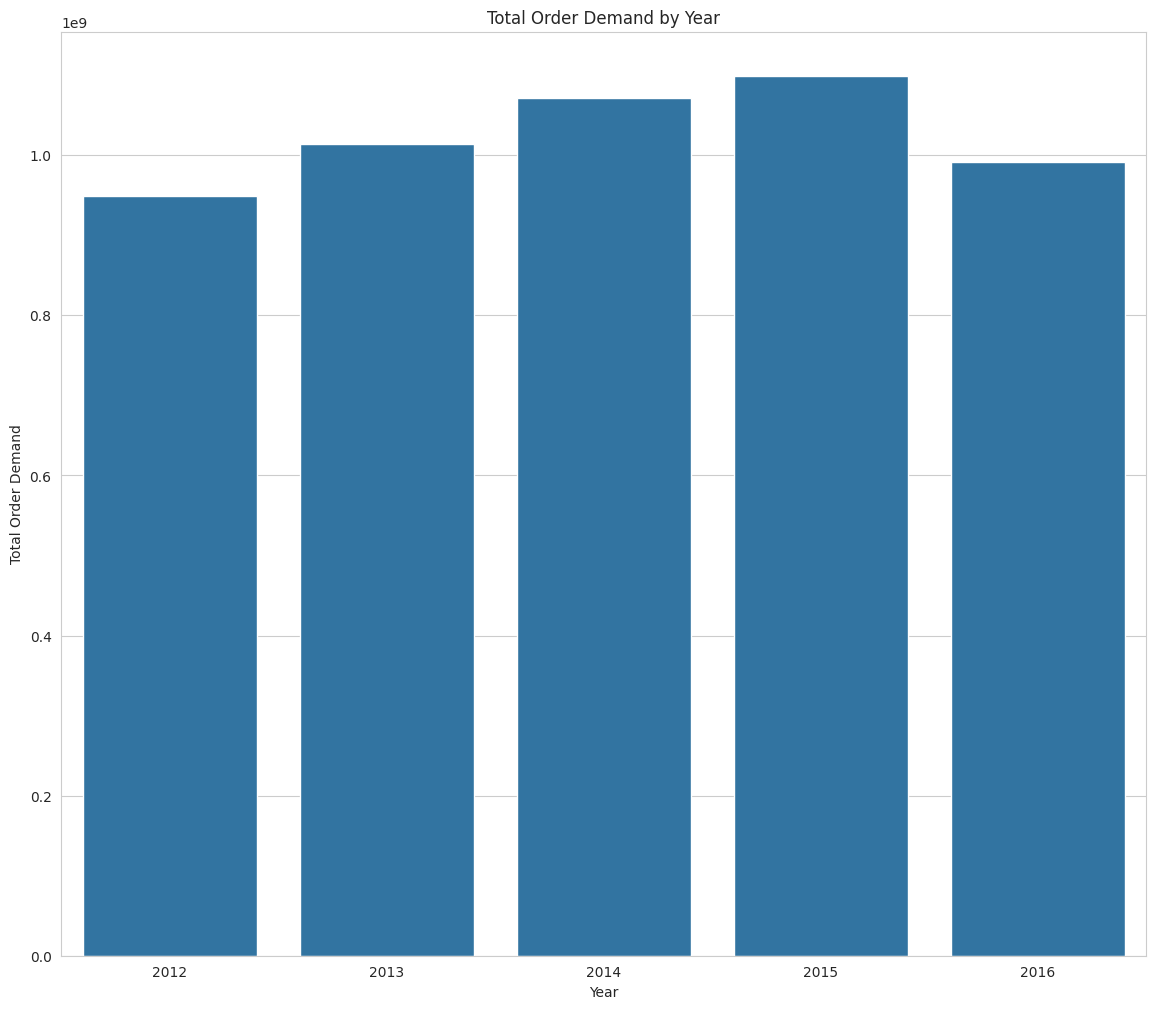

In [ ]:
# Resample the data to get the total order demand for each year
total_demand_year = df['Order_Demand'].resample('Y').sum()

# Create a bar plot for total order demand by year
sns.barplot(x=total_demand_year.index.year, y=total_demand_year.values)

plt.title('Total Order Demand by Year')
plt.xlabel('Year')
plt.ylabel('Total Order Demand')
plt.show()


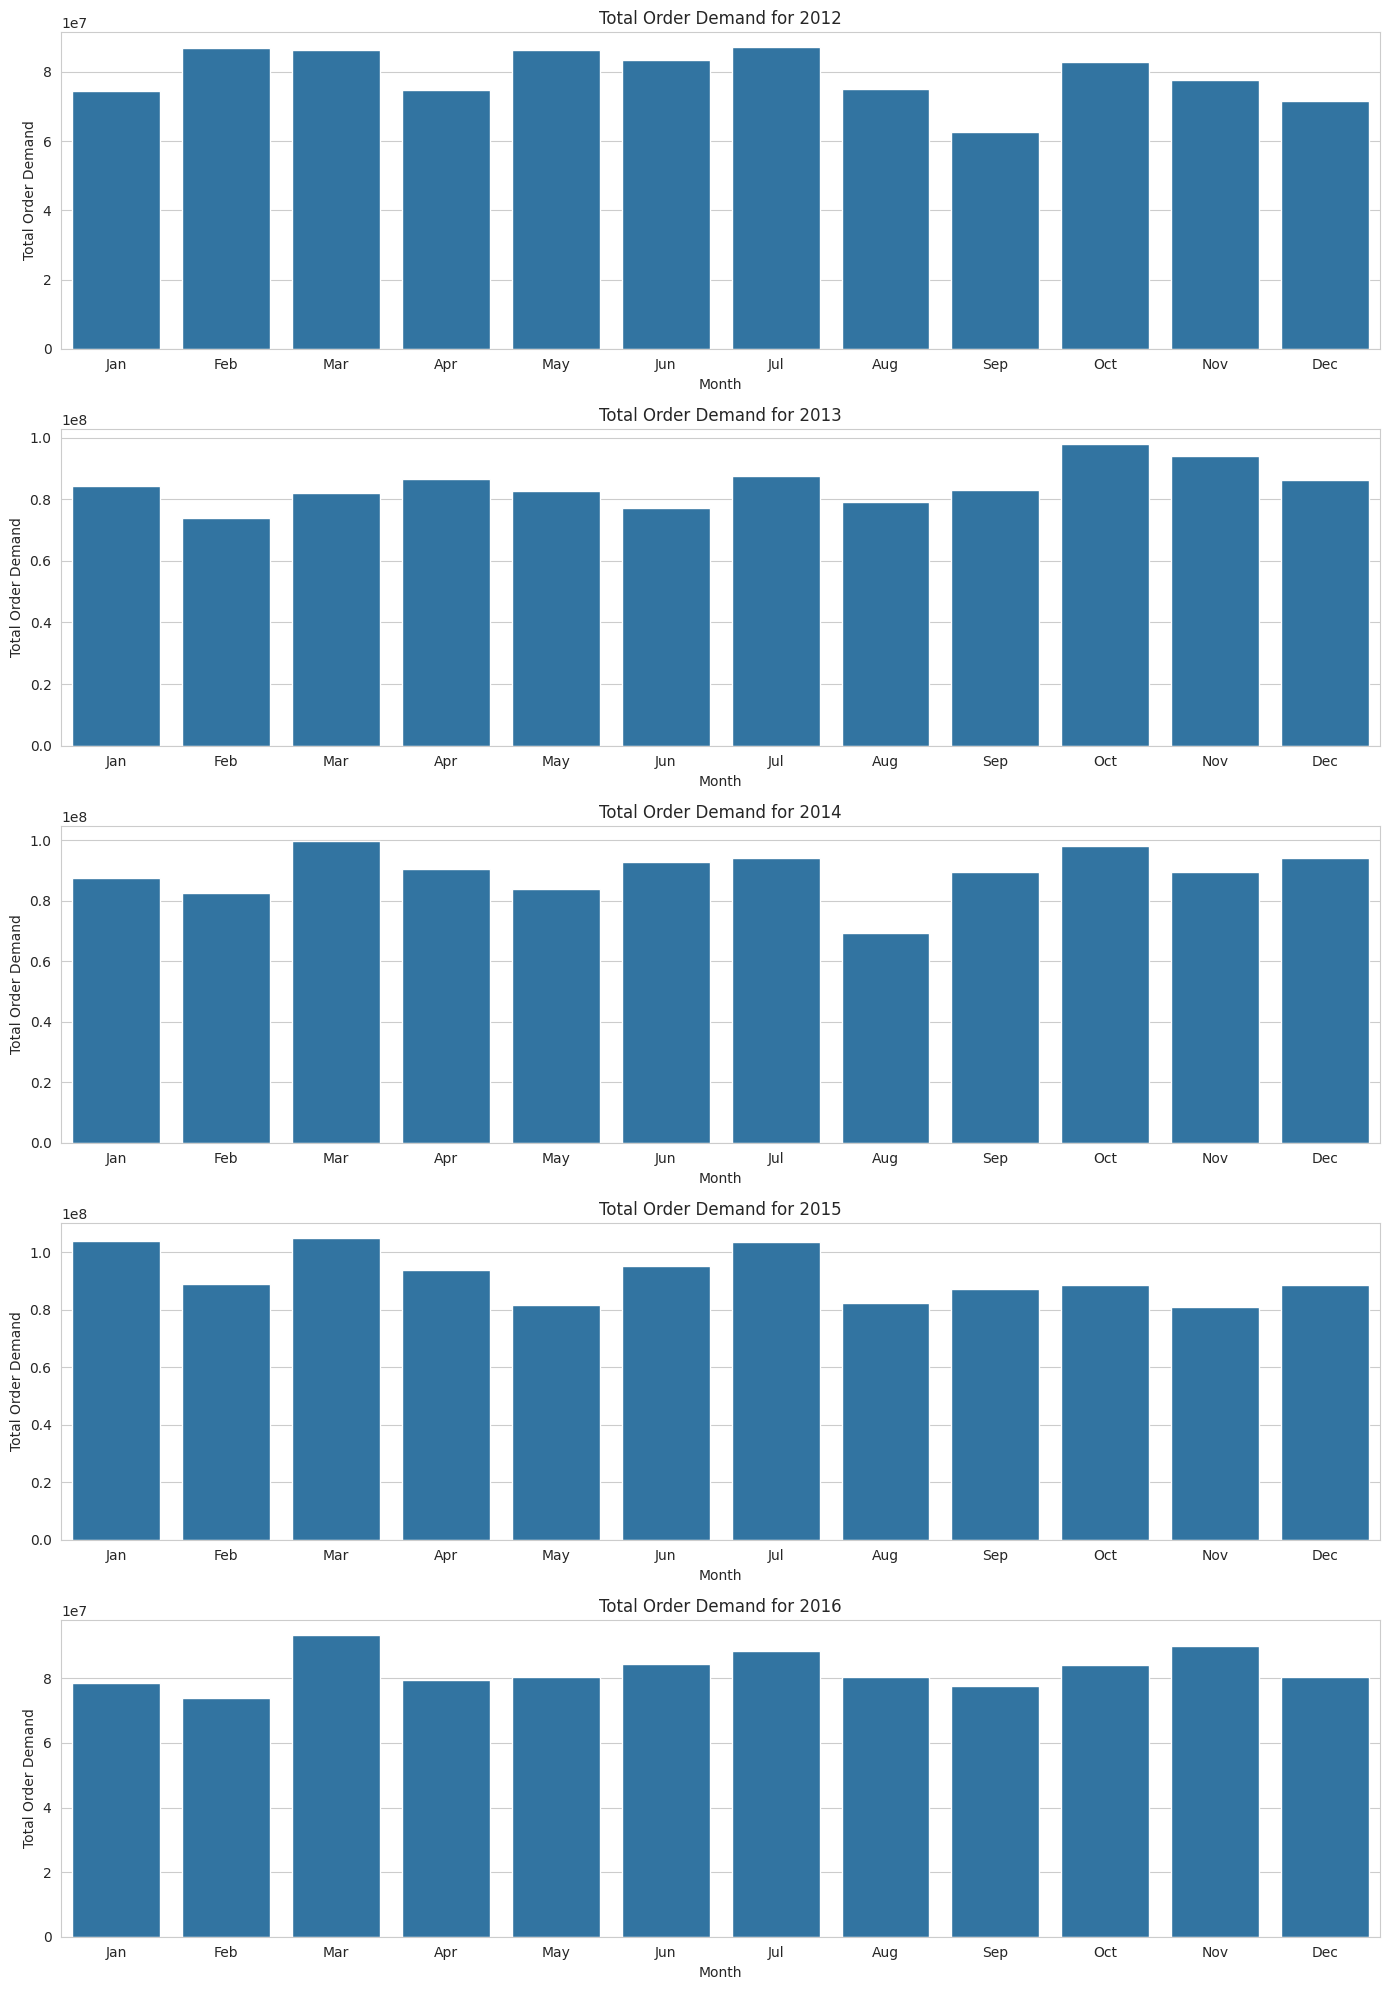

In [ ]:
df['Year'] = df.index.year
df['Month'] = df.index.month

# Loop through each year and plot the total demand per month
years = [2012, 2013, 2014, 2015, 2016]

plt.figure(figsize=(14, 20))

for i, year in enumerate(years, 1):
    plt.subplot(5, 1, i)  # Create subplots (5 rows, 1 column, i-th plot)
    # Filter data for the specific year and resample monthly
    yearly_data = df[df['Year'] == year].resample('M').sum()

    # Plot a bar chart for each year
    sns.barplot(x=yearly_data.index.month, y=yearly_data['Order_Demand'])
    plt.title(f'Total Order Demand for {year}')
    plt.xlabel('Month')
    plt.ylabel('Total Order Demand')
    plt.xticks(range(12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


In [ ]:
del df['Year']
del df['Month']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1036643 entries, 2012-01-01 to 2016-12-30
Data columns (total 4 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Product_Code      1036643 non-null  object
 1   Warehouse         1036643 non-null  object
 2   Product_Category  1036643 non-null  object
 3   Order_Demand      1036643 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 39.5+ MB


In [ ]:
df

,Product_Code,Warehouse,Product_Category,Order_Demand
Date,,,,
2012-01-01,Product_2166,Whse_S,Category_024,2
2012-01-02,Product_0614,Whse_S,Category_001,3
2012-01-02,Product_1281,Whse_S,Category_019,14000
2012-01-02,Product_1355,Whse_S,Category_019,5000
2012-01-02,Product_2169,Whse_S,Category_024,55
...,...,...,...,...
2016-12-30,Product_0200,Whse_A,Category_007,20
2016-12-30,Product_1388,Whse_A,Category_019,100
2016-12-30,Product_1341,Whse_S,Category_019,15000


In [ ]:
df = df[df['Order_Demand'] >= 0]  # Remove negative demand if present

In [ ]:
# Reset the index to convert the Date index back to a column
df = df.reset_index()
monthly_demand = df.resample('M', on='Date')['Order_Demand'].sum()
monthly_demand

,Order_Demand
Date,
2012-01-31,74331037
2012-02-29,86951780
2012-03-31,86463212
2012-04-30,74714053
2012-05-31,86246051
2012-06-30,83521679
2012-07-31,87071567
2012-08-31,75003241
2012-09-30,62748329


In [ ]:

# Group by Warehouse and Product_Category, then resample
monthly_demand = (df.groupby(['Warehouse', 'Product_Category'])
                  .resample('M', on='Date')['Order_Demand']
                  .sum()
                  .reset_index())
monthly_demand

,Warehouse,Product_Category,Date,Order_Demand
0,Whse_A,Category_001,2013-06-30,51
1,Whse_A,Category_001,2013-07-31,37
2,Whse_A,Category_001,2013-08-31,32
3,Whse_A,Category_001,2013-09-30,60
4,Whse_A,Category_001,2013-10-31,0
...,...,...,...,...
5232,Whse_S,Category_032,2016-08-31,119314
5233,Whse_S,Category_032,2016-09-30,7564
5234,Whse_S,Category_032,2016-10-31,34126
5235,Whse_S,Category_032,2016-11-30,6996


In [ ]:
monthly_demand.head(20)

,Warehouse,Product_Category,Date,Order_Demand
0,Whse_A,Category_001,2013-06-30,51
1,Whse_A,Category_001,2013-07-31,37
2,Whse_A,Category_001,2013-08-31,32
3,Whse_A,Category_001,2013-09-30,60
4,Whse_A,Category_001,2013-10-31,0
5,Whse_A,Category_001,2013-11-30,52
6,Whse_A,Category_001,2013-12-31,0
7,Whse_A,Category_001,2014-01-31,44
8,Whse_A,Category_001,2014-02-28,139
9,Whse_A,Category_001,2014-03-31,187


In [ ]:
monthly_demand.tail(20)

,Warehouse,Product_Category,Date,Order_Demand
5217,Whse_S,Category_032,2015-05-31,83994
5218,Whse_S,Category_032,2015-06-30,91756
5219,Whse_S,Category_032,2015-07-31,24260
5220,Whse_S,Category_032,2015-08-31,95394
5221,Whse_S,Category_032,2015-09-30,64086
5222,Whse_S,Category_032,2015-10-31,36122
5223,Whse_S,Category_032,2015-11-30,11054
5224,Whse_S,Category_032,2015-12-31,74458
5225,Whse_S,Category_032,2016-01-31,8010
5226,Whse_S,Category_032,2016-02-29,61428


# Filter the data for a specific Warehouse and Product_Category
- for ex : warehouse = 'Whse_A'
product_category = 'Category_001'

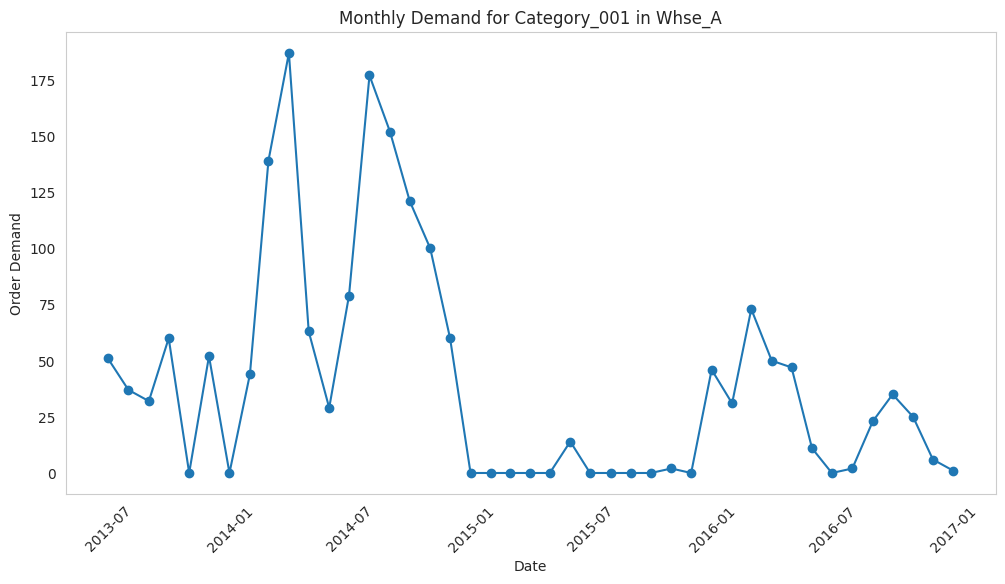

In [ ]:
import matplotlib.pyplot as plt

# Filter the data for a specific Warehouse and Product_Category
warehouse = 'Whse_A'
product_category = 'Category_001'
filtered_data = monthly_demand[(monthly_demand['Warehouse'] == warehouse) &
                                (monthly_demand['Product_Category'] == product_category)]

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(filtered_data['Date'], filtered_data['Order_Demand'], marker='o')
plt.title(f'Monthly Demand for {product_category} in {warehouse}')
plt.xlabel('Date')
plt.ylabel('Order Demand')
plt.xticks(rotation=45)
plt.grid()
plt.show()


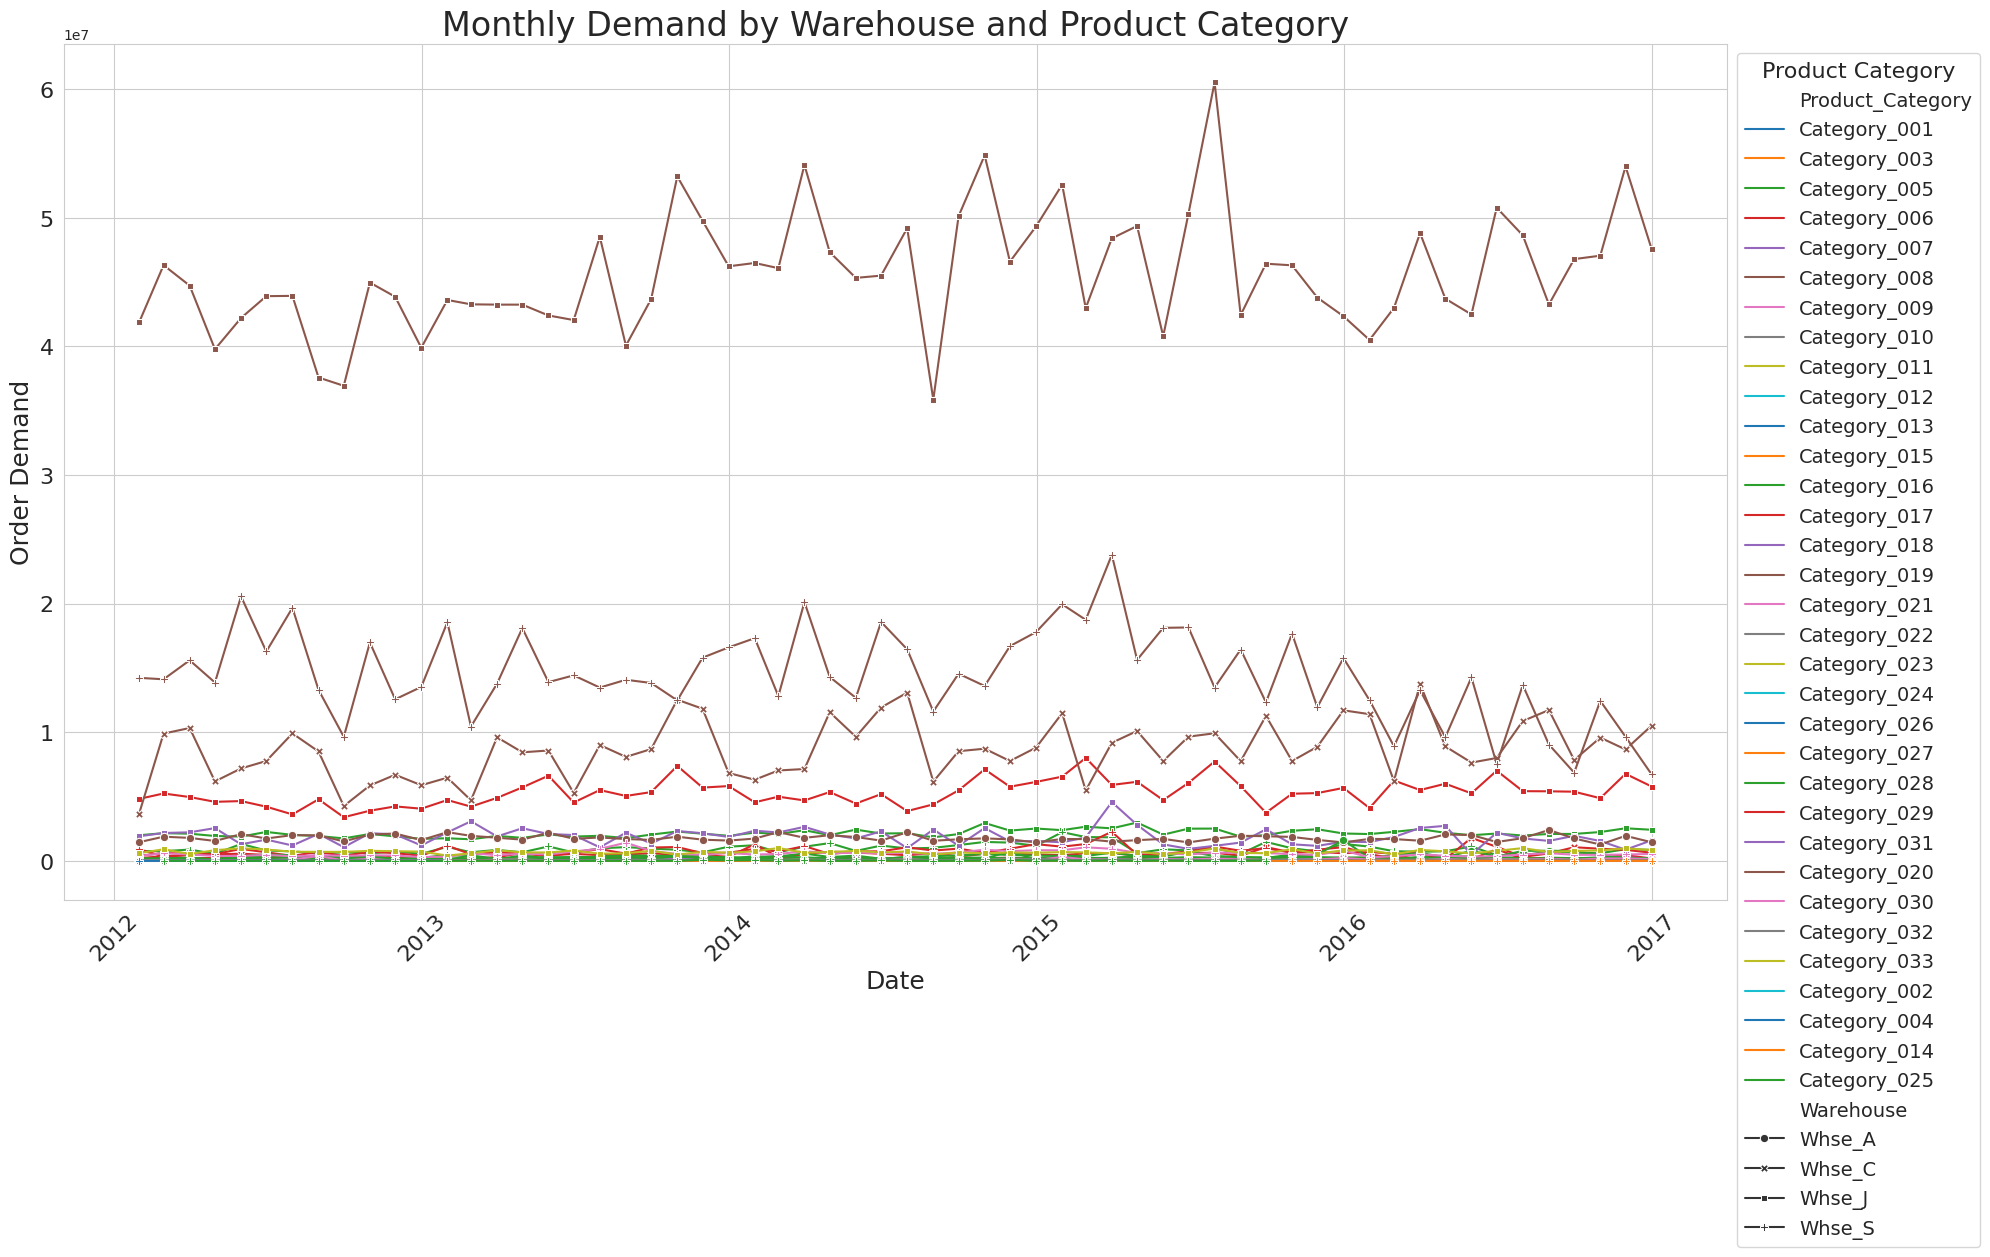

In [ ]:
# Set a larger size for the plot
plt.figure(figsize=(20, 12))

sns.lineplot(data=monthly_demand,
              x='Date',
              y='Order_Demand',
              hue='Product_Category',
              style='Warehouse',
              markers=True,
              palette='tab10',
              dashes=False)

# Add titles and labels with increased font size
plt.title('Monthly Demand by Warehouse and Product Category', fontsize=24)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Order Demand', fontsize=18)
plt.xticks(rotation=45, fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)

plt.legend(title='Product Category', title_fontsize='16', fontsize='14', loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()



In [ ]:
df

,Date,Product_Code,Warehouse,Product_Category,Order_Demand
0,2012-01-01,Product_2166,Whse_S,Category_024,2
1,2012-01-02,Product_0614,Whse_S,Category_001,3
2,2012-01-02,Product_1281,Whse_S,Category_019,14000
3,2012-01-02,Product_1355,Whse_S,Category_019,5000
4,2012-01-02,Product_2169,Whse_S,Category_024,55
...,...,...,...,...,...
1036638,2016-12-30,Product_0200,Whse_A,Category_007,20
1036639,2016-12-30,Product_1388,Whse_A,Category_019,100
1036640,2016-12-30,Product_1341,Whse_S,Category_019,15000
1036641,2016-12-30,Product_1513,Whse_A,Category_019,100


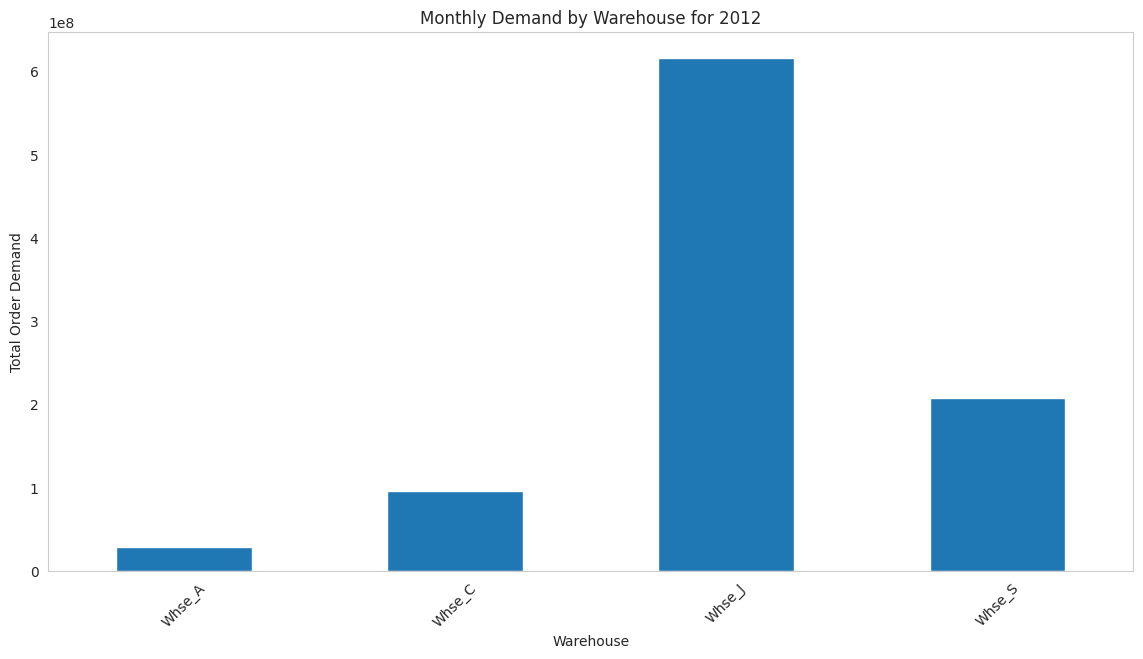

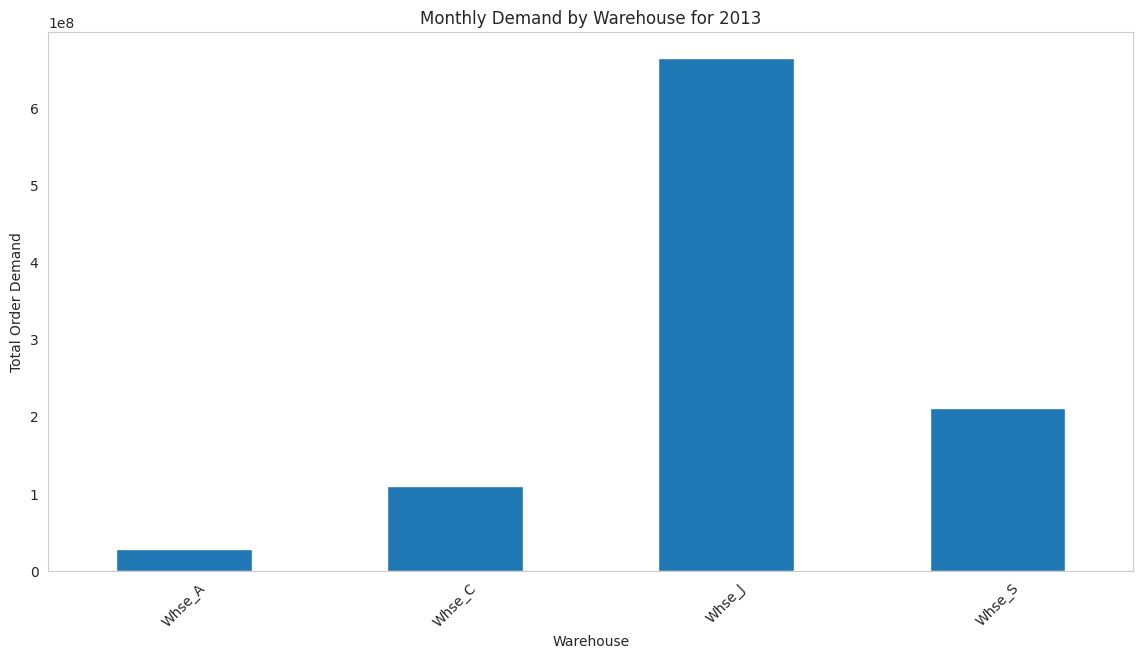

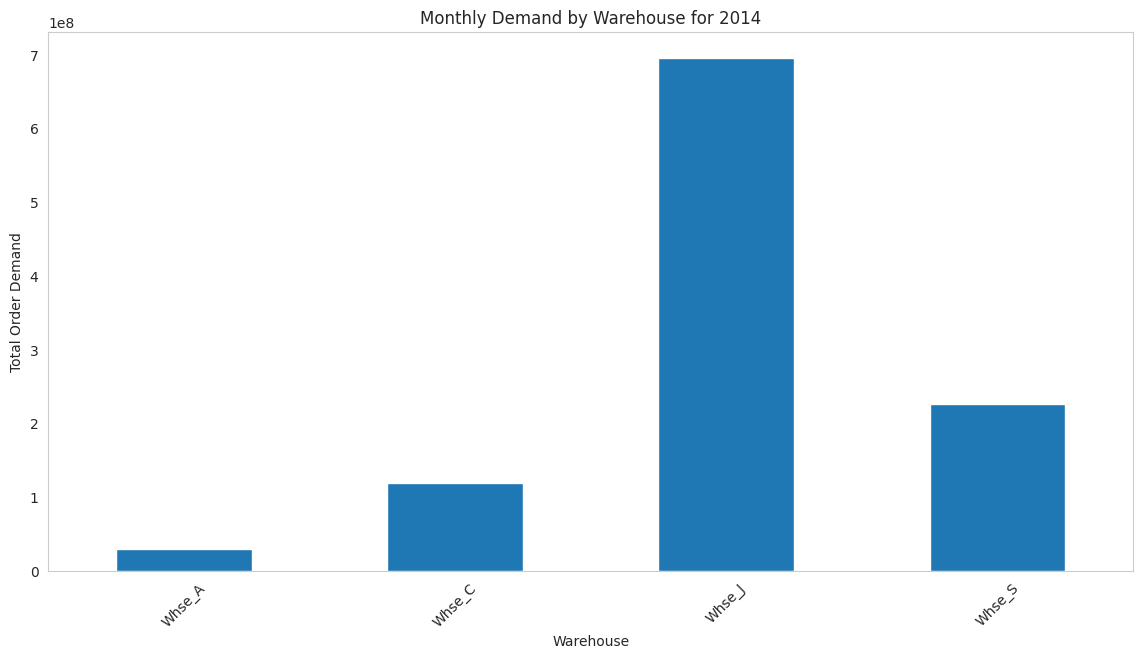

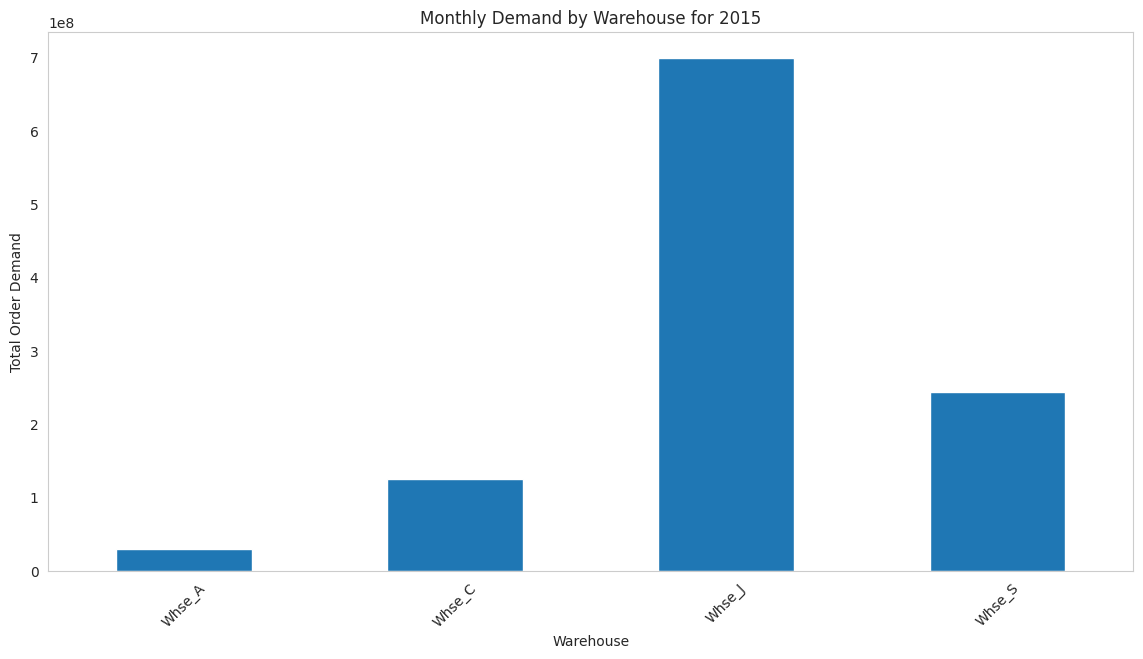

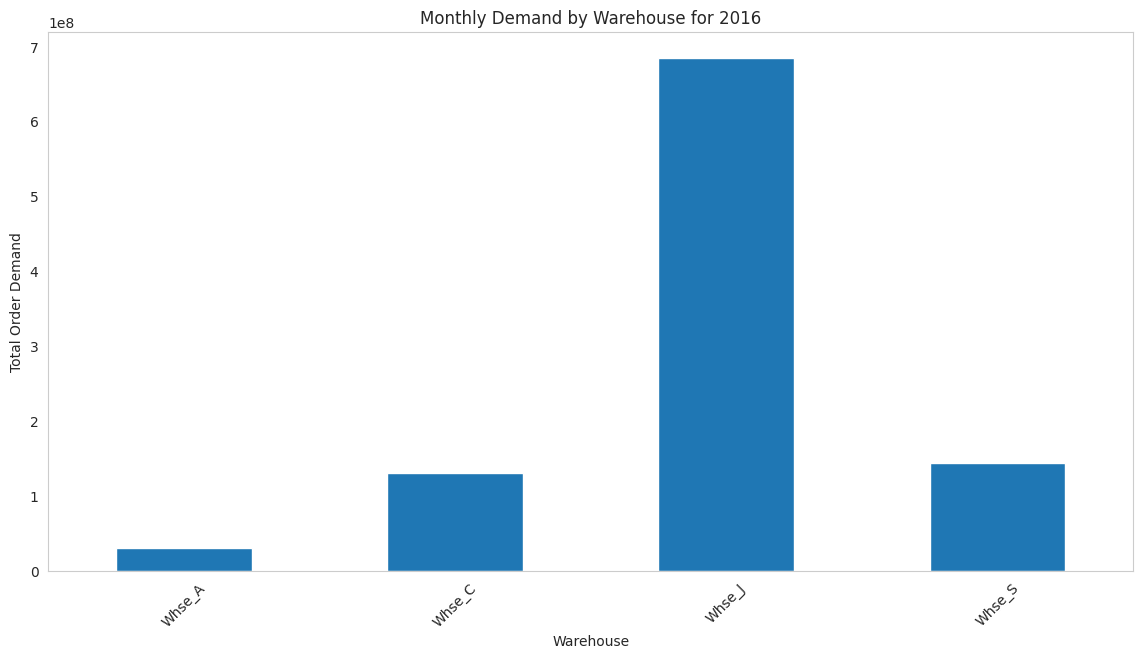

In [ ]:

df['Year'] = df['Date'].dt.year

# Group by Year and Warehouse, summing the Order_Demand
warehouse_performance = df.groupby(['Year', 'Warehouse'])['Order_Demand'].sum().unstack()

# Plot for each year
for year in warehouse_performance.index:
    plt.figure(figsize=(14, 7))
    warehouse_performance.loc[year].plot(kind='bar')
    plt.title(f'Monthly Demand by Warehouse for {year}')
    plt.xlabel('Warehouse')
    plt.ylabel('Total Order Demand')
    plt.xticks(rotation=45)
    plt.grid()
    plt.show()


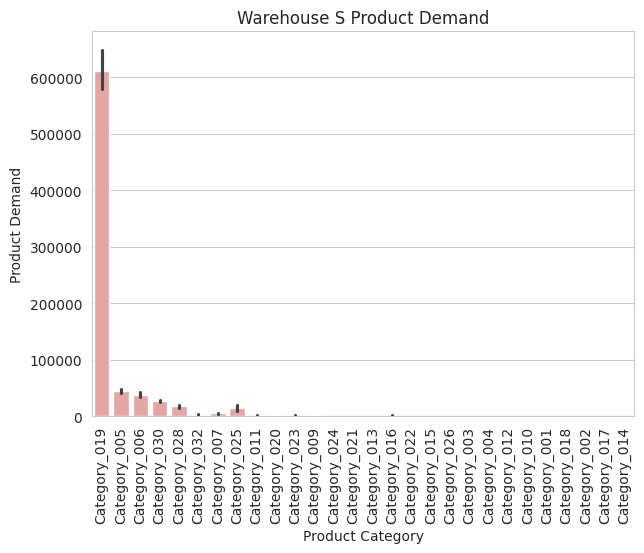

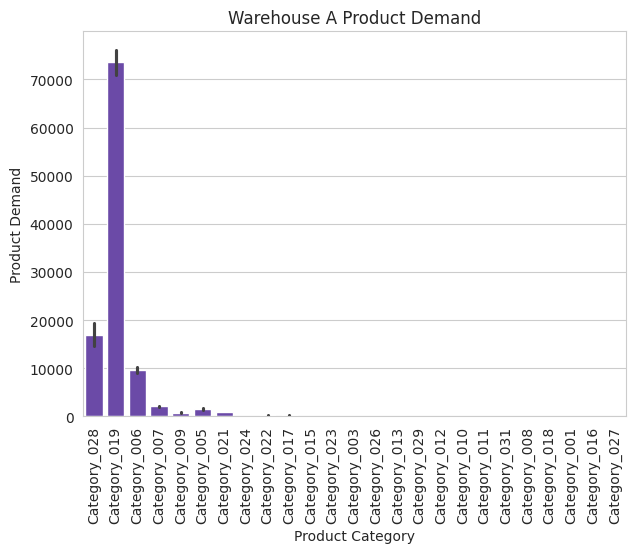

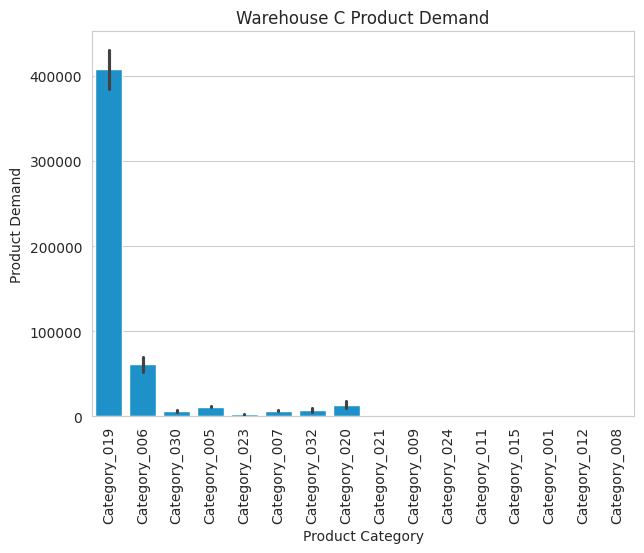

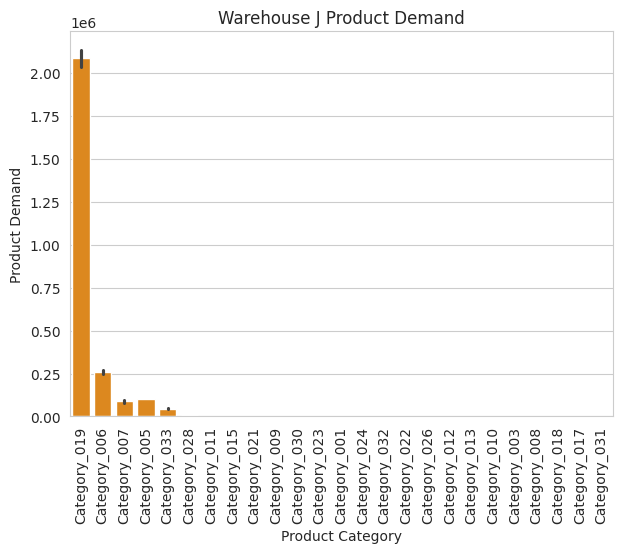

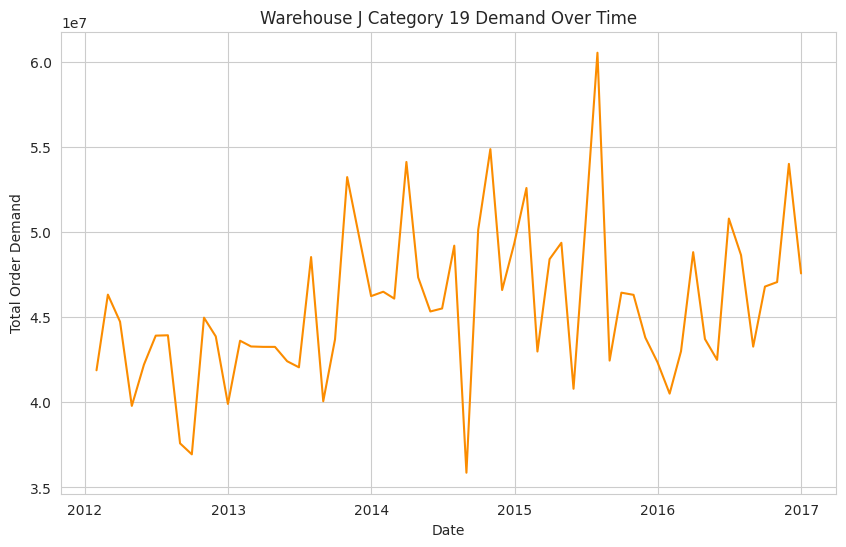

In [ ]:
#We will begin by breaking each warehouse into its own dataframe
whse_s_df = df[df['Warehouse']=='Whse_S']
whse_a_df = df[df['Warehouse']=='Whse_A']
whse_c_df = df[df['Warehouse']=='Whse_C']
whse_j_df = df[df['Warehouse']=='Whse_J']

#Now we can begin looking at the product category of the demand
whse_s_df_group_category = whse_s_df.groupby(['Date', 'Product_Category'])['Order_Demand'].sum().reset_index().sort_values('Order_Demand', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=whse_s_df_group_category, x='Product_Category', y='Order_Demand', color ="#EF9A9A")
plt.title('Warehouse S Product Demand')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Product Demand')
plt.show()

#Rinse and repeat for all of the other datatypes
whse_a_df_group_category = whse_a_df.groupby(['Date', 'Product_Category'])['Order_Demand'].sum().reset_index().sort_values('Order_Demand', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=whse_a_df_group_category, x='Product_Category', y='Order_Demand', color ="#673AB7")
plt.title('Warehouse A Product Demand')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Product Demand')
plt.show()

whse_c_df_group_category = whse_c_df.groupby(['Date', 'Product_Category'])['Order_Demand'].sum().reset_index().sort_values('Order_Demand', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=whse_c_df_group_category, x='Product_Category', y='Order_Demand', color ="#039BE5")
plt.title('Warehouse C Product Demand')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Product Demand')
plt.show()

whse_j_df_group_category = whse_j_df.groupby(['Date', 'Product_Category'])['Order_Demand'].sum().reset_index().sort_values('Order_Demand', ascending=False)
plt.figure(figsize=(7, 5))
sns.barplot(data=whse_j_df_group_category, x='Product_Category', y='Order_Demand', color ="#FB8C00")
plt.title('Warehouse J Product Demand')
plt.xlabel('Product Category')
plt.xticks(rotation=90)
plt.ylabel('Product Demand')
plt.show()

#Now before building out the demand forecast, lets go ahead and isolate product 19 at the largest warehouse
whse_j_df_cat_19 = whse_j_df[whse_j_df['Product_Category']=='Category_019']
whse_j_df_cat_19_group = whse_j_df_cat_19.groupby(pd.Grouper(key='Date', freq='M'))['Order_Demand'].sum().reset_index()

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=whse_j_df_cat_19_group, x='Date', y='Order_Demand', color = '#FB8C00')
plt.title('Warehouse J Category 19 Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Total Order Demand')
plt.show()

What is the makeup of demand by each warehouse?

Demand across the board focuses heavily on Product "Category 019".  every warehouse is heavily skewed towards this product. As this category represents such a large amount of our workload.

Now that we understand Product 019 is the main product category and we understand the demand by "warehouse J", we are prepared to build a forecast and then measure success based on those decisions.

# filter the data
- ['Warehouse'] == 'Whse_J') ['Product_Category'] == 'Category_019')

In [ ]:
category_19_df = df[(df['Warehouse'] == 'Whse_J') & (df['Product_Category'] == 'Category_019')]

In [ ]:
category_19_df

,Date,Product_Code,Warehouse,Product_Category,Order_Demand,Year
429,2012-01-05,Product_1463,Whse_J,Category_019,2000,2012
430,2012-01-05,Product_1387,Whse_J,Category_019,2000,2012
431,2012-01-05,Product_1275,Whse_J,Category_019,1200,2012
432,2012-01-05,Product_1515,Whse_J,Category_019,2500,2012
434,2012-01-05,Product_1458,Whse_J,Category_019,1000,2012
...,...,...,...,...,...,...
1036589,2016-12-29,Product_1378,Whse_J,Category_019,10000,2016
1036590,2016-12-29,Product_1550,Whse_J,Category_019,150,2016
1036591,2016-12-29,Product_1382,Whse_J,Category_019,10000,2016
1036603,2016-12-29,Product_1463,Whse_J,Category_019,300,2016


## remove unneeded features

In [ ]:
del category_19_df['Product_Code']
del category_19_df['Warehouse']
del category_19_df['Product_Category']
del category_19_df['Year']

# Resample the data to daily frequency (sum of order demand per day)


In [ ]:
# Set the index to the date column
category_19_df.set_index('Date', inplace=True)
data_daily = category_19_df.resample('D').sum()


In [ ]:
data_daily

,Order_Demand
Date,
2012-01-05,3327899
2012-01-06,2935425
2012-01-07,0
2012-01-08,0
2012-01-09,0
...,...
2016-12-25,0
2016-12-26,2716996
2016-12-27,1052094


In [ ]:
365*5

1825

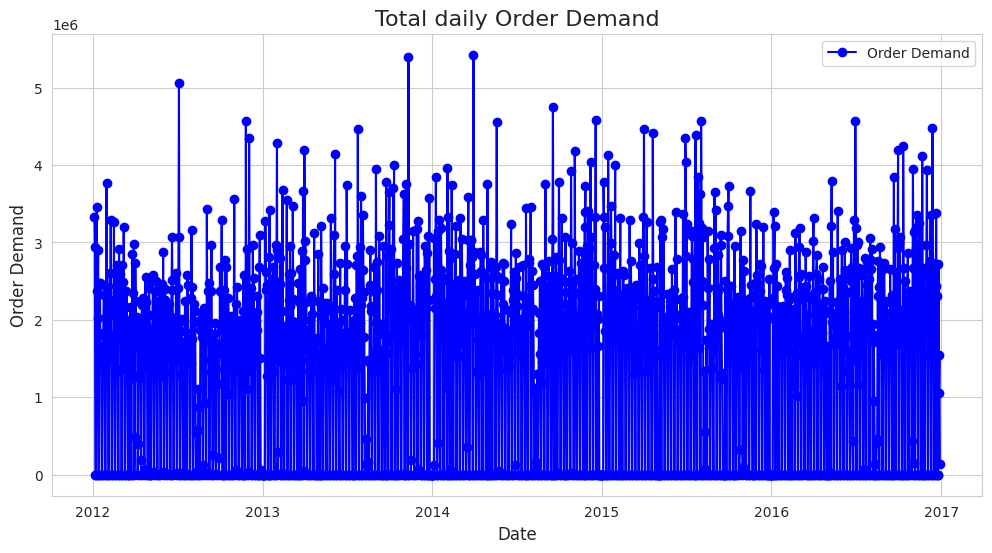

In [ ]:
# Create the plot with labels and titles
plt.figure(figsize=(12, 6))
plt.plot(data_daily.index, data_daily, marker='o', linestyle='-', color='b', label='Order Demand')

# Add plot titles and labels
plt.title('Total daily Order Demand', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Demand', fontsize=12)

plt.grid(True)
plt.legend()
plt.show()

# 0 values as we observed in correlations plot -- > weekend days

In [ ]:
# Check for 0 values
print("Minimum value in Demand:", data_daily['Order_Demand'].min())
print("Number of non-positive values:", (data_daily['Order_Demand'] == 0).sum())


Minimum value in Demand: 0
Number of non-positive values: 542


In [ ]:
# Print summary statistics
print("Summary statistics of Demand:")
print(data_daily['Order_Demand'].describe())

Summary statistics of Demand:
count    1.821000e+03
mean     1.504308e+06
std      1.208594e+06
min      0.000000e+00
25%      0.000000e+00
50%      1.792285e+06
75%      2.370982e+06
max      5.425385e+06
Name: Order_Demand, dtype: float64


In [ ]:
data_daily

,Order_Demand
Date,
2012-01-05,3327899
2012-01-06,2935425
2012-01-07,0
2012-01-08,0
2012-01-09,0
...,...
2016-12-25,0
2016-12-26,2716996
2016-12-27,1052094


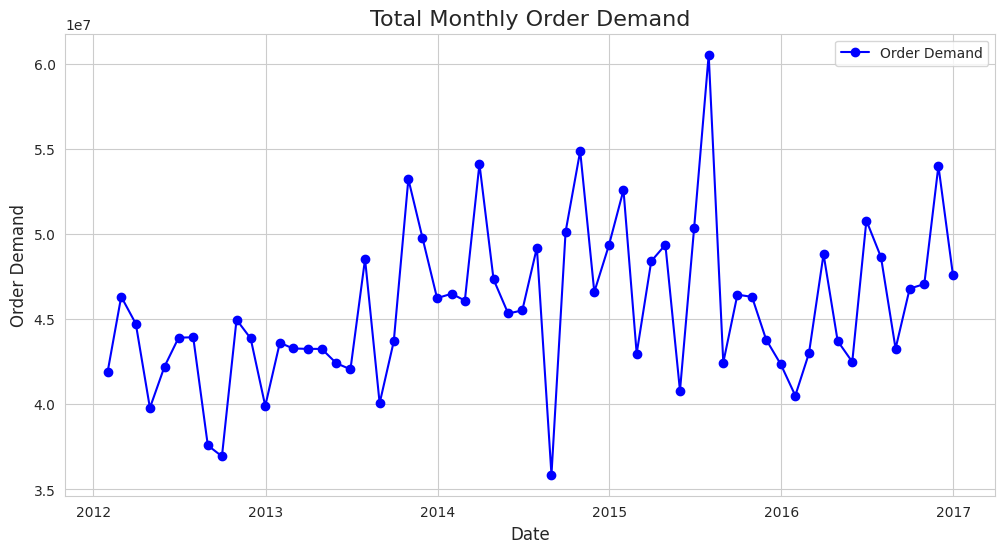

In [ ]:
# Resample the order demand to monthly frequency and aggregate by sum
monthly_demand = data_daily['Order_Demand'].resample('M').sum()

# Create the plot with labels and titles
plt.figure(figsize=(12, 6))  # Set the figure size
plt.plot(monthly_demand.index, monthly_demand, marker='o', linestyle='-', color='b', label='Order Demand')

# Add plot titles and labels
plt.title('Total Monthly Order Demand', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Demand', fontsize=12)

# Add a grid for easier readability
plt.grid(True)

# Show the legend
plt.legend()

# Display the plot
plt.show()


In [ ]:
pip install neuralprophet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 43.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 869.2/869.2 kB 43.9 MB/s eta 0:00:00


In [ ]:
pip install neuralprophet[live]

In [ ]:
pip install prophet


In [ ]:
data_daily

,Order_Demand
Date,
2012-01-05,3327899
2012-01-06,2935425
2012-01-07,0
2012-01-08,0
2012-01-09,0
...,...
2016-12-25,0
2016-12-26,2716996
2016-12-27,1052094


In [ ]:
data_daily=data_daily.reset_index()

In [ ]:
data_daily.columns

Index(['Date', 'Order_Demand'], dtype='object')

In [ ]:
new_column = data_daily[['Date', 'Order_Demand']]
new_column.columns = ['ds', 'y']
new_column.head()

,ds,y
0,2012-01-05,3327899
1,2012-01-06,2935425
2,2012-01-07,0
3,2012-01-08,0
4,2012-01-09,0


In [ ]:
from neuralprophet import NeuralProphet

n = NeuralProphet()
model = n.fit(new_column, freq='D', epochs=500)

WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (57) is too small than the required number                     for the learning rate finder (232). The results might not be optimal.


Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 29. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 29. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
future_periods = 30  # For example, forecasting for the next 30 days

# Create a future DataFrame for the specified periods
future = n.make_future_dataframe(new_column, periods=future_periods)

# Predict the future values
forecast = n.predict(future)

# Display the last few rows of the forecasted results
print(forecast.tail())

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.945% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.945% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 96.667% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 96.667% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


           ds     y         yhat1        trend  season_yearly  season_weekly
25 2017-01-24  None  2.356597e+06  1595590.000   20045.109375   7.409618e+05
26 2017-01-25  None  2.211637e+06  1595733.625   25982.582031   5.899208e+05
27 2017-01-26  None  2.231119e+06  1595877.250   31030.154297   6.042114e+05
28 2017-01-27  None  2.255758e+06  1596021.000   35164.320312   6.245732e+05
29 2017-01-28  None  9.014366e+04  1596164.625   38358.695312  -1.544380e+06


In [ ]:
plot = n.plot(forecast)
plot.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [ ]:
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2016-12-30,None,2.029266e+06,1591998.125,-187954.406250,6.252227e+05
1,2016-12-31,None,-1.389439e+05,1592141.875,-186873.187500,-1.544213e+06
2,2017-01-01,None,-1.217167e+05,1592285.500,-184567.937500,-1.529434e+06
3,2017-01-02,None,1.924495e+06,1592429.250,-181088.890625,5.131545e+05
4,2017-01-03,None,2.157348e+06,1592573.000,-176489.843750,7.412651e+05
5,2017-01-04,None,2.011721e+06,1592716.625,-170839.515625,5.898437e+05
6,2017-01-05,None,2.033339e+06,1592860.250,-164203.343750,6.046824e+05
7,2017-01-06,None,2.059637e+06,1593003.875,-156658.765625,6.232914e+05
8,2017-01-07,None,-9.808806e+04,1593147.500,-148274.296875,-1.542961e+06
9,2017-01-08,None,-7.484653e+04,1593291.250,-139183.750000,-1.528954e+06


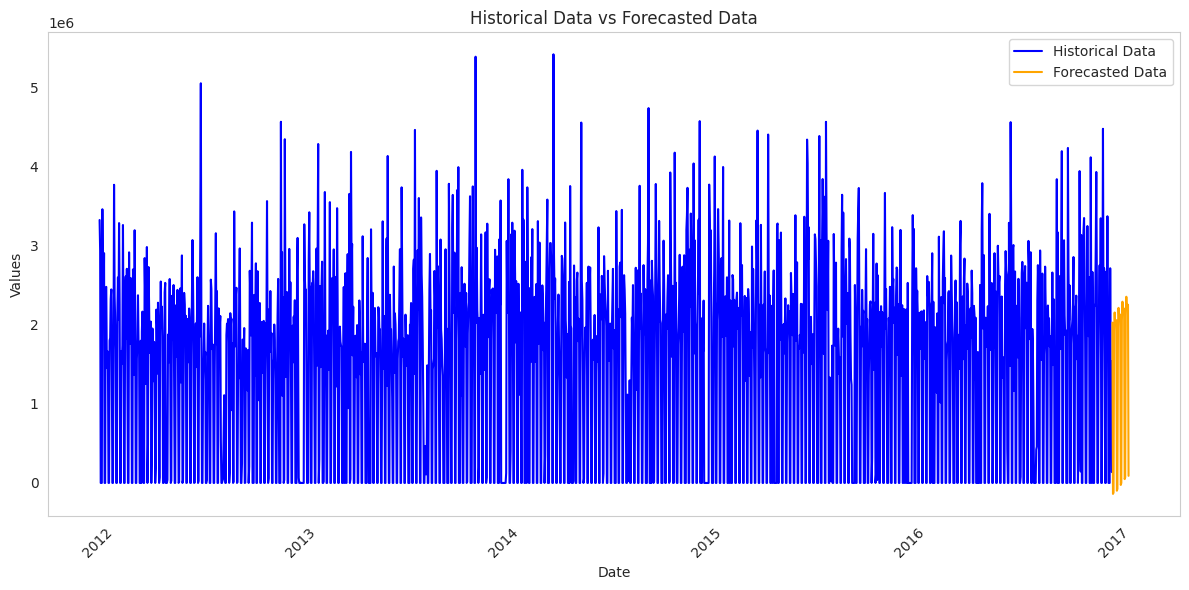

In [ ]:
# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(new_column['ds'], new_column['y'], label='Historical Data', color='blue')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecasted Data', color='orange')

# Add titles and labels
plt.title('Historical Data vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot the forecast components
n.plot_components(forecast)


WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




# Replace the negative values with 0 becouse we do not have vegative orders  but we have 0 in weekend days

In [ ]:
forecast['yhat1'] = forecast['yhat1'].apply(lambda x: max(0, x))
forecast

,ds,y,yhat1,trend,season_yearly,season_weekly
0,2016-12-30,None,2.029266e+06,1591998.125,-187954.406250,6.252227e+05
1,2016-12-31,None,0.000000e+00,1592141.875,-186873.187500,-1.544213e+06
2,2017-01-01,None,0.000000e+00,1592285.500,-184567.937500,-1.529434e+06
3,2017-01-02,None,1.924495e+06,1592429.250,-181088.890625,5.131545e+05
4,2017-01-03,None,2.157348e+06,1592573.000,-176489.843750,7.412651e+05
5,2017-01-04,None,2.011721e+06,1592716.625,-170839.515625,5.898437e+05
6,2017-01-05,None,2.033339e+06,1592860.250,-164203.343750,6.046824e+05
7,2017-01-06,None,2.059637e+06,1593003.875,-156658.765625,6.232914e+05
8,2017-01-07,None,0.000000e+00,1593147.500,-148274.296875,-1.542961e+06
9,2017-01-08,None,0.000000e+00,1593291.250,-139183.750000,-1.528954e+06


In [ ]:
plot = n.plot(forecast)
plot.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




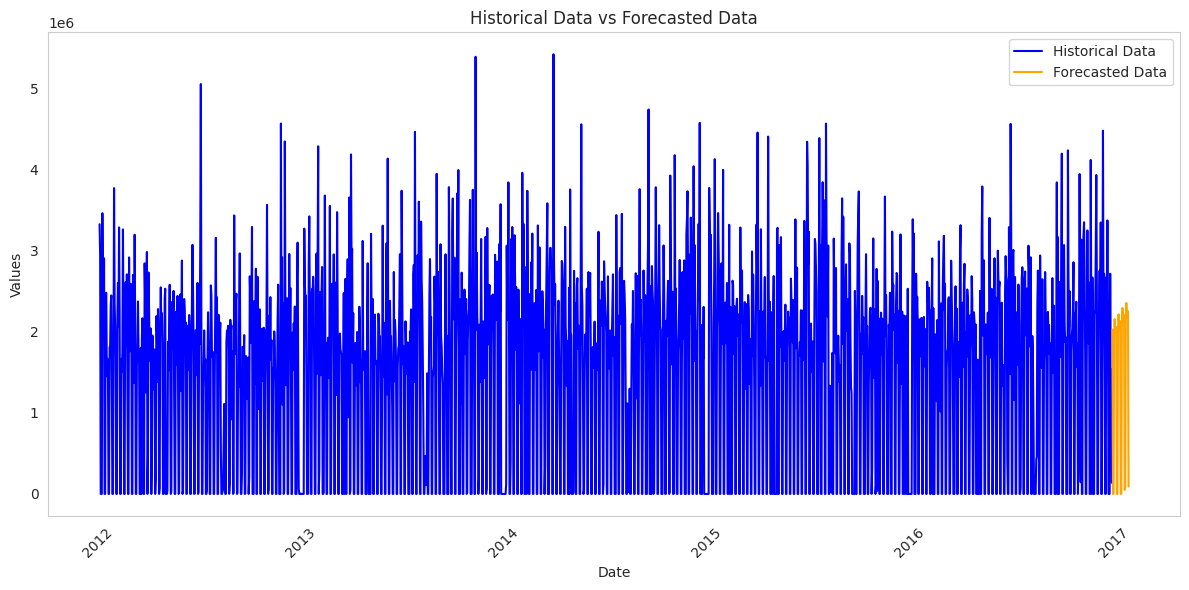

In [ ]:
# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(new_column['ds'], new_column['y'], label='Historical Data', color='blue')

# Plot forecasted data
plt.plot(forecast['ds'], forecast['yhat1'], label='Forecasted Data', color='orange')

# Add titles and labels
plt.title('Historical Data vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

# modeling on monthly demand

In [ ]:
monthly_demand

,Order_Demand
Date,
2012-01-31,41880352
2012-02-29,46322882
2012-03-31,44733524
2012-04-30,39788207
2012-05-31,42216008
2012-06-30,43914422
2012-07-31,43935601
2012-08-31,37587409
2012-09-30,36942949


In [ ]:
monthly_demand=monthly_demand.reset_index()

In [ ]:
monthly_demand.columns

Index(['Date', 'Order_Demand'], dtype='object')

In [ ]:
new_column1 = monthly_demand[['Date', 'Order_Demand']]
new_column1.columns = ['ds', 'y']
new_column1.head()

,ds,y
0,2012-01-31,41880352
1,2012-02-29,46322882
2,2012-03-31,44733524
3,2012-04-30,39788207
4,2012-05-31,42216008


In [ ]:
from neuralprophet import NeuralProphet

n2 = NeuralProphet()
model2 = n2.fit(new_column1, freq='M', epochs=500)


WARNING - (NP.forecaster.fit) - When Global modeling with local normalization, metrics are displayed in normalized scale.
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.333]% of the data.
INFO:NP.df_utils:Major frequency M corresponds to [98.333]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO:NP.utils:Disabling weekly seasonality. Run NeuralProphet with weekly_seasonality=True to override this.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with dai

Training: |          | 0/? [00:00<?, ?it/s]

WARNING - (NP.config.set_lr_finder_args) - Learning rate finder: The number of batches (8) is too small than the required number                     for the learning rate finder (205). The results might not be optimal.


Finding best initial lr:   0%|          | 0/205 [00:00<?, ?it/s]

WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 8. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/pytorch_lightning/utilities/data.py:78: UserWarning:

Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.



Trying to infer the `batch_size` from an ambiguous collection. The batch size we found is 4. To avoid any miscalculations, use `self.log(..., batch_size=batch_size)`.




Training: |          | 0/? [00:00<?, ?it/s]

In [ ]:
future_periods = 30  # For example, forecasting for the next 30 days

# Create a future DataFrame for the specified periods
future2 = n2.make_future_dataframe(new_column1, periods=future_periods)

# Predict the future values
forecast2= n2.predict(future2)

# Display the last few rows of the forecasted results
print(forecast2.tail())

INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [98.333]% of the data.
INFO:NP.df_utils:Major frequency M corresponds to [98.333]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [96.667]% of the data.
INFO:NP.df_utils:Major frequency M corresponds to [96.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - M
INFO:NP.df_utils:Defined frequency is equal to major frequency - M
INFO - (NP.df_utils._infer_frequency) - Major frequency M corresponds to [96.667]% of the data.
INFO:NP.df_utils:Major frequency M corresponds to [96.667]% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined 

Predicting: |          | 0/? [00:00<?, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


           ds     y       yhat1       trend  season_yearly
25 2019-02-28  None  50407220.0  52328436.0   -1921216.125
26 2019-03-31  None  54622743.0  52513004.0    2109740.250
27 2019-04-30  None  51999476.0  52691624.0    -692144.250
28 2019-05-31  None  49494922.0  52876192.0   -3381266.000
29 2019-06-30  None  54775989.0  53054804.0    1721186.375


In [ ]:
plot2 = n2.plot(forecast2)
plot2.show()

WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:100: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result




In [ ]:
forecast2

,ds,y,yhat1,trend,season_yearly
0,2017-01-31,None,47212810.0,47815420.0,-6.026101e+05
1,2017-02-28,None,45995624.0,47982128.0,-1.986503e+06
2,2017-03-31,None,50407702.0,48166696.0,2.241005e+06
3,2017-04-30,None,47464952.0,48345312.0,-8.803601e+05
4,2017-05-31,None,45269020.0,48529880.0,-3.260861e+06
5,2017-06-30,None,50458920.0,48708496.0,1.750423e+06
6,2017-07-31,None,53164729.0,48893064.0,4.271664e+06
7,2017-08-31,None,43976545.5,49077636.0,-5.101089e+06
8,2017-09-30,None,49178716.0,49256252.0,-7.753555e+04
9,2017-10-31,None,52586534.0,49440820.0,3.145716e+06


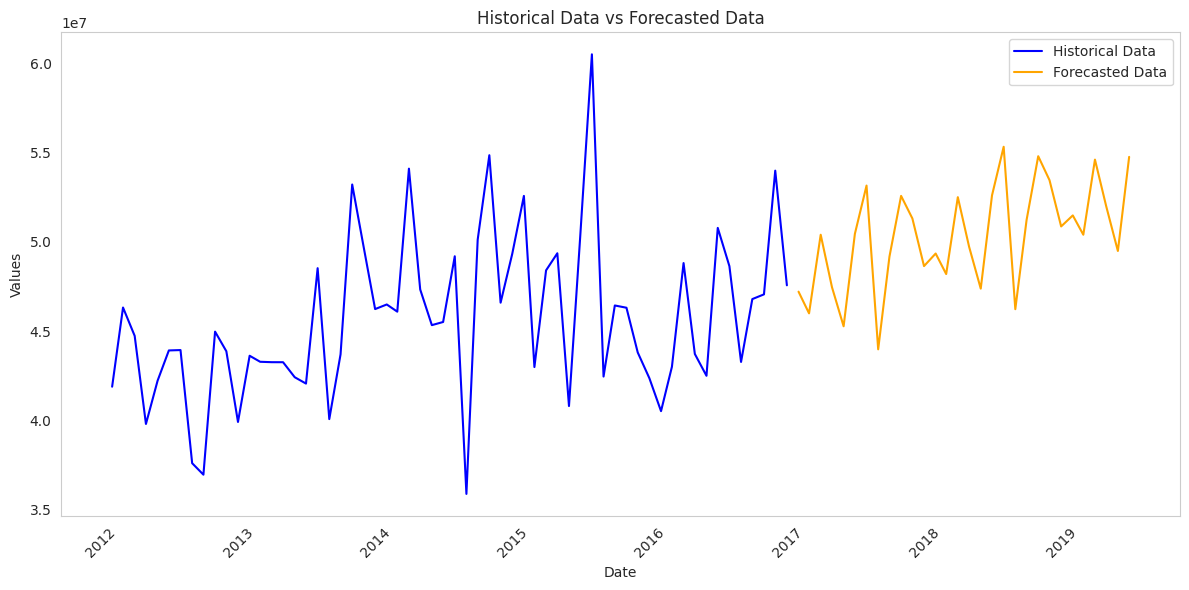

In [ ]:
# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))

# Plot historical data
plt.plot(new_column1['ds'], new_column1['y'], label='Historical Data', color='blue')

# Plot forecasted data
plt.plot(forecast2['ds'], forecast2['yhat1'], label='Forecasted Data', color='orange')

# Add titles and labels
plt.title('Historical Data vs Forecasted Data')
plt.xlabel('Date')
plt.ylabel('Values')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
# Plot the forecast components
n2.plot_components(forecast2)


WARNING - (NP.plotting.log_warning_resampler_switch_to_valid_env) - Warning: plotly-resampler not supported for the environment you are using. Plotting backend automatically switched to 'plotly' without resampling 
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/neuralprophet/plot_forecast_plotly.py:410: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result


